In [1]:
#Kết nối drive :
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import các thư viện cần thiết :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Đọc các tập dữ liệu và nhận xét tổng quan về dữ liệu :**

In [3]:
#Đọc file dữ liệu :
path_GDP = '/content/drive/MyDrive/DataAnalyst/LyThuyet/Analyst_GPD/GDP_AND_GDP_GROWTH.csv'
path_GOODS = '/content/drive/MyDrive/DataAnalyst/LyThuyet/Analyst_GPD/GOODS_EXPORTS_IMPORTS.csv'
path_MANU = '/content/drive/MyDrive/DataAnalyst/LyThuyet/Analyst_GPD/MANUFACTURING.csv'

#Tiến hành đọc và loại bỏ cột 'Country Code' các tập dữ liệu trên :
df = pd.read_csv(path_GDP, index_col='Series Name', usecols=lambda column: column != 'Country Code')
df_GOODS = pd.read_csv(path_GOODS, index_col='Series Name', usecols=lambda column: column != 'Country Code')
df_MANU = pd.read_csv(path_MANU, index_col='Series Name', usecols=lambda column: column != 'Country Code')


print(df.shape)
print(df_GOODS.shape)
print(df_MANU.shape)

(532, 24)
(532, 24)
(798, 24)


**Nhận xét tổng quan về tập dữ liệu :** Gồm các tập dữ liệu liên quan đến GDP của 266 quốc gia trên thế giới trong những năm đầu của thế kỉ 21 (từ năm 2000 - năm 2021) . Gồm 3 tập dữ liệu :
1. Tập dữ liệu GDP : GDP (Gross Domestic Product) của các nước và tốc độ tăng trưởng GDP của các nước đó (GDP Growth Rate)
2. Tập dữ liệu Hàng Hoá xuất nhập khẩu : giá trị hàng hoá xuất khẩu và giá trị hàng hoá nhập khẩu của các nước
3. Tập dữ liệu về ngành công nghiệp : Tỉ lệ thêm vào trong GDP , tỉ lệ trong tốc độ tăng trưởng và giá trị ngành công nghiệp của các nước





In [4]:
df.head()

Country Name  2000 [YR2000]  2001 [YR2001]  \
Series Name                                                       
GDP (current US$)     Afghanistan            NaN            NaN   
GDP (current US$)         Albania   3.480355e+09   3.922101e+09   
GDP (current US$)         Algeria   5.479040e+10   5.474470e+10   
GDP (current US$)  American Samoa            NaN            NaN   
GDP (current US$)         Andorra   1.429048e+09   1.546912e+09   

                   2002 [YR2002]  2003 [YR2003]  2004 [YR2004]  2005 [YR2005]  \
Series Name                                                                     
GDP (current US$)   3.825701e+09   4.520947e+09   5.224897e+09   6.203256e+09   
GDP (current US$)   4.348068e+09   5.611496e+09   7.184686e+09   8.052077e+09   
GDP (current US$)   5.676036e+10   6.786385e+10   8.533258e+10   1.031982e+11   
GDP (current US$)   5.120000e+08   5.240000e+08   5.090000e+08   5.000000e+08   
GDP (current US$)   1.755989e+09   2.361636e+09   2.895048e+09   3.159827e+09   

                   2006 [YR2006]  2007 [YR2007]  2008 [YR2008]  ...  \
Series Name                                                     ...   
GDP (current US$)   6.971758e+09   9.747886e+09   1.010930e+10  ...   
GDP (current US$)   8.896075e+09   1.067732e+10   1.288135e+10  ...   
GDP (current US$)   1.170273e+11   1.349771e+11   1.710007e+11  ...   
GDP (current US$)   4.930000e+08   5.180000e+08   5.600000e+08  ...   
GDP (current US$)   3.456264e+09   3.952395e+09   4.085780e+09  ...   

                   2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  \
Series Name                                                                     
GDP (current US$)   2.014642e+10   2.049713e+10   1.913422e+10   1.811657e+10   
GDP (current US$)   1.277622e+10   1.322815e+10   1.138685e+10   1.186120e+10   
GDP (current US$)   2.097550e+11   2.138100e+11   1.659792e+11   1.600342e+11   
GDP (current US$)   6.380000e+08   6.430000e+08   6.730000e+08   6.710000e+08   
GDP (current US$)   3.193513e+09   3.271686e+09   2.789883e+09   2.896612e+09   

                   2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  2020 [YR2020]  \
Series Name                                                                     
GDP (current US$)   1.875346e+10   1.805322e+10   1.879944e+10   1.995593e+10   
GDP (current US$)   1.301973e+10   1.515642e+10   1.540183e+10   1.516273e+10   
GDP (current US$)   1.700970e+11   1.749107e+11   1.717603e+11   1.457435e+11   
GDP (current US$)   6.120000e+08   6.390000e+08   6.470000e+08   7.210000e+08   
GDP (current US$)   3.000160e+09   3.218419e+09   3.155150e+09   2.891002e+09   

                   2021 [YR2021]  2022 [YR2022]  
Series Name                                      
GDP (current US$)   1.426650e+10            NaN  
GDP (current US$)   1.793057e+10   1.891638e+10  
GDP (current US$)   1.634724e+11   1.949984e+11  
GDP (current US$)   7.500000e+08   8.710000e+08  
GDP (current US$)   3.325144e+09   3.352031e+09  

[5 rows x 24 columns]

In [5]:
df_GOODS.head()

Country Name  2000 [YR2000]  \
Series Name                                                       
Goods exports (BoP, current US$)     Afghanistan            NaN   
Goods exports (BoP, current US$)         Albania     95200000.0   
Goods exports (BoP, current US$)         Algeria            NaN   
Goods exports (BoP, current US$)  American Samoa            NaN   
Goods exports (BoP, current US$)         Andorra            NaN   

                                  2001 [YR2001]  2002 [YR2002]  2003 [YR2003]  \
Series Name                                                                     
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)    109500000.0     85180000.0   1.007163e+08   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)            NaN            NaN            NaN   

                                  2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  \
Series Name                                                                     
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)   1.490324e+08   1.941178e+08   2.236194e+08   
Goods exports (BoP, current US$)            NaN   4.633400e+10   5.474000e+10   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)            NaN            NaN            NaN   

                                  2007 [YR2007]  2008 [YR2008]  ...  \
Series Name                                                     ...   
Goods exports (BoP, current US$)            NaN   5.632992e+08  ...   
Goods exports (BoP, current US$)   3.598384e+08   5.462147e+08  ...   
Goods exports (BoP, current US$)   6.049014e+10   7.806256e+10  ...   
Goods exports (BoP, current US$)            NaN            NaN  ...   
Goods exports (BoP, current US$)            NaN            NaN  ...   

                                  2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  \
Series Name                                                                     
Goods exports (BoP, current US$)   5.057926e+08   6.417674e+08   5.778598e+08   
Goods exports (BoP, current US$)   1.417739e+09   1.239879e+09   8.553368e+08   
Goods exports (BoP, current US$)   6.481704e+10   6.003358e+10   3.444918e+10   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)            NaN            NaN            NaN   

                                  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  \
Series Name                                                                     
Goods exports (BoP, current US$)   6.142176e+08   7.839629e+08   8.752427e+08   
Goods exports (BoP, current US$)   7.892216e+08   9.012436e+08   1.163649e+09   
Goods exports (BoP, current US$)   2.931694e+10   3.456962e+10   4.112352e+10   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)            NaN            NaN            NaN   

                                  2019 [YR2019]  2020 [YR2020]  2021 [YR2021]  \
Series Name                                                                     
Goods exports (BoP, current US$)   8.638344e+08   7.767345e+08            NaN   
Goods exports (BoP, current US$)   1.014732e+09   9.085507e+08   1.494341e+09   
Goods exports (BoP, current US$)   3.531271e+10   2.191499e+10   3.862835e+10   
Goods exports (BoP, current US$)            NaN            NaN            NaN   
Goods exports (BoP, current US$)   1.299725e+08   1.694008e+08   1.767902e+08   

                                  2022 [YR2022]  
Series Name                                      
Goods exports (BoP, current US$)            NaN  
Goods exports (BoP, current US$)   2.037015e+09  
Goods exports (BoP, current 

In [6]:
df_MANU.head()

Country Name  2000 [YR2000]  \
Series Name                                                            
Manufacturing, value added (% of GDP)     Afghanistan            NaN   
Manufacturing, value added (% of GDP)         Albania       4.317846   
Manufacturing, value added (% of GDP)         Algeria      44.980398   
Manufacturing, value added (% of GDP)  American Samoa            NaN   
Manufacturing, value added (% of GDP)         Andorra       3.830854   

                                       2001 [YR2001]  2002 [YR2002]  \
Series Name                                                           
Manufacturing, value added (% of GDP)            NaN      18.822752   
Manufacturing, value added (% of GDP)       4.099040       4.066543   
Manufacturing, value added (% of GDP)      40.233796      38.773735   
Manufacturing, value added (% of GDP)            NaN      21.289062   
Manufacturing, value added (% of GDP)       3.451747       3.438148   

                                       2003 [YR2003]  2004 [YR2004]  \
Series Name                                                           
Manufacturing, value added (% of GDP)      16.923866      17.554006   
Manufacturing, value added (% of GDP)       4.124160       4.177557   
Manufacturing, value added (% of GDP)      41.065045      42.845111   
Manufacturing, value added (% of GDP)      20.610687      15.520629   
Manufacturing, value added (% of GDP)       3.615788       3.655048   

                                       2005 [YR2005]  2006 [YR2006]  \
Series Name                                                           
Manufacturing, value added (% of GDP)      16.598212      16.385537   
Manufacturing, value added (% of GDP)       4.425844       4.904925   
Manufacturing, value added (% of GDP)      48.797326      49.879423   
Manufacturing, value added (% of GDP)      13.600000      13.590264   
Manufacturing, value added (% of GDP)       3.476748       3.435047   

                                       2007 [YR2007]  2008 [YR2008]  ...  \
Series Name                                                          ...   
Manufacturing, value added (% of GDP)      17.747310      17.839116  ...   
Manufacturing, value added (% of GDP)       5.296791       4.997798  ...   
Manufacturing, value added (% of GDP)      47.801117      48.954780  ...   
Manufacturing, value added (% of GDP)      14.864865      20.000000  ...   
Manufacturing, value added (% of GDP)       3.398816       3.576934  ...   

                                       2013 [YR2013]  2014 [YR2014]  \
Series Name                                                           
Manufacturing, value added (% of GDP)      11.499867      11.477588   
Manufacturing, value added (% of GDP)       5.059801       5.325789   
Manufacturing, value added (% of GDP)      33.548896      30.936034   
Manufacturing, value added (% of GDP)      14.576803      11.975117   
Manufacturing, value added (% of GDP)       3.838156       3.676874   

                                       2015 [YR2015]  2016 [YR2016]  \
Series Name                                                           
Manufacturing, value added (% of GDP)      11.420006       4.114197   
Manufacturing, value added (% of GDP)       5.671519       5.684427   
Manufacturing, value added (% of GDP)      23.173097      21.684683   
Manufacturing, value added (% of GDP)      13.967311      13.710879   
Manufacturing, value added (% of GDP)       3.706090       3.741125   

                                       2017 [YR2017]  2018 [YR2018]  \
Series Name                                                           
Manufacturing, value added (% of GDP)       3.530422       6.160177   
Manufacturing, value added (% of GDP)       6.158167       6.133294   
Manufacturing, value added (% of GDP)      23.919040      26.550617   
Manufacturing, value added (% of GDP)      10.947712      13.928013   
Manufacturing, value added (% of GDP)       3.748833       3.610284   

               

**Kiểm tra tổng quan dữ liệu :**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, GDP (current US$) to GDP growth (annual %)
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   532 non-null    object 
 1   2000 [YR2000]  485 non-null    float64
 2   2001 [YR2001]  493 non-null    float64
 3   2002 [YR2002]  499 non-null    float64
 4   2003 [YR2003]  504 non-null    float64
 5   2004 [YR2004]  504 non-null    float64
 6   2005 [YR2005]  505 non-null    float64
 7   2006 [YR2006]  506 non-null    float64
 8   2007 [YR2007]  507 non-null    float64
 9   2008 [YR2008]  508 non-null    float64
 10  2009 [YR2009]  511 non-null    float64
 11  2010 [YR2010]  512 non-null    float64
 12  2011 [YR2011]  515 non-null    float64
 13  2012 [YR2012]  513 non-null    float64
 14  2013 [YR2013]  514 non-null    float64
 15  2014 [YR2014]  517 non-null    float64
 16  2015 [YR2015]  515 non-null    float64
 17  2016 [YR2016]  514 non-nu

In [8]:
df_GOODS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, Goods exports (BoP, current US$) to Goods imports (BoP, current US$)
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   532 non-null    object 
 1   2000 [YR2000]  380 non-null    float64
 2   2001 [YR2001]  384 non-null    float64
 3   2002 [YR2002]  396 non-null    float64
 4   2003 [YR2003]  400 non-null    float64
 5   2004 [YR2004]  406 non-null    float64
 6   2005 [YR2005]  440 non-null    float64
 7   2006 [YR2006]  446 non-null    float64
 8   2007 [YR2007]  452 non-null    float64
 9   2008 [YR2008]  456 non-null    float64
 10  2009 [YR2009]  460 non-null    float64
 11  2010 [YR2010]  462 non-null    float64
 12  2011 [YR2011]  468 non-null    float64
 13  2012 [YR2012]  468 non-null    float64
 14  2013 [YR2013]  466 non-null    float64
 15  2014 [YR2014]  472 non-null    float64
 16  2015 [YR2015]  470 non-null    float64
 17 

In [9]:
df_MANU.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, Manufacturing, value added (% of GDP) to Manufacturing, value added (current US$)
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   798 non-null    object 
 1   2000 [YR2000]  583 non-null    float64
 2   2001 [YR2001]  601 non-null    float64
 3   2002 [YR2002]  616 non-null    float64
 4   2003 [YR2003]  629 non-null    float64
 5   2004 [YR2004]  652 non-null    float64
 6   2005 [YR2005]  655 non-null    float64
 7   2006 [YR2006]  665 non-null    float64
 8   2007 [YR2007]  674 non-null    float64
 9   2008 [YR2008]  680 non-null    float64
 10  2009 [YR2009]  685 non-null    float64
 11  2010 [YR2010]  686 non-null    float64
 12  2011 [YR2011]  695 non-null    float64
 13  2012 [YR2012]  699 non-null    float64
 14  2013 [YR2013]  703 non-null    float64
 15  2014 [YR2014]  704 non-null    float64
 16  2015 [YR2015]  704 non-null   

#**Tiền xử lý dữ liệu :**

In [10]:
print(df.index.unique())
print(df_GOODS.index.unique())
print(df_MANU.index.unique())

Index(['GDP (current US$)', 'GDP growth (annual %)'], dtype='object', name='Series Name')
Index(['Goods exports (BoP, current US$)', 'Goods imports (BoP, current US$)'], dtype='object', name='Series Name')
Index(['Manufacturing, value added (% of GDP)',
       'Manufacturing, value added (annual % growth)',
       'Manufacturing, value added (current US$)'],
      dtype='object', name='Series Name')


In [11]:
#Tách GPD và GDP_GROWTH ra thành 2 tập :
df_GDP = df[df.index == 'GDP (current US$)'].set_index('Country Name')
df_GDP_GRW = df[df.index == 'GDP growth (annual %)'].set_index('Country Name')

#Tách tập GOODS thành 2 tập là EXPORTS VÀ IMPORTS :
df_EXPORTS = df_GOODS[df_GOODS.index == 'Goods exports (BoP, current US$)'].set_index('Country Name')
df_IMPORTS = df_GOODS[df_GOODS.index == 'Goods imports (BoP, current US$)'].set_index('Country Name')

#Và tập Manufaturing chỉ lấy ảnh hưởng tới GDP :
df_MANU = df_MANU[df_MANU.index == 'Manufacturing, value added (% of GDP)'].set_index('Country Name')

In [12]:
#Tính tổng số năm bị khuyết dữ liệu của mỗi quốc gia :
null_counts_1 = df_GDP.isnull().sum(axis=1)
null_counts_2 = df_GDP_GRW.isnull().sum(axis=1)
null_counts_3 = df_EXPORTS.isnull().sum(axis=1)
null_counts_4 = df_IMPORTS.isnull().sum(axis=1)
null_counts_5 = df_MANU.isnull().sum(axis=1)

#Lọc ra các quốc gia có số năm bị có tổng số dữ liệu khuyết từ 10 trở lên :
countries_1= df_GDP.index[null_counts_1 >= 10]
countries_2 = df_GDP_GRW.index[null_counts_2 >= 10]
countries_3 = df_EXPORTS.index[null_counts_3 >= 10]
countries_4 = df_IMPORTS.index[null_counts_4 >= 10]
countries_5 = df_MANU.index[null_counts_5 >= 10]

#Gộp các countries thành một DataFrame duy nhất :
all_countries = countries_1.union(countries_2).union(countries_3).union(countries_4).union(countries_5)

#Loại bỏ các giá trị trùng lặp :
countries = all_countries.drop_duplicates()

all_countries

Index(['Afghanistan', 'American Samoa', 'Andorra', 'Arab World', 'Armenia',
       'British Virgin Islands', 'Bulgaria', 'Caribbean small states',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands',
       'Comoros', 'Cuba', 'Curacao', 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Faroe Islands', 'Fragile and conflict affected situations',
       'Gibraltar', 'Greenland', 'Guam', 'Iran, Islamic Rep.', 'Isle of Man',
       'Korea, Dem. People's Rep.', 'Liberia', 'Liechtenstein', 'Malawi',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Middle East & North Africa',
       'Monaco', 'Myanmar', 'Nauru', 'New Caledonia',
       'Northern Mariana Islands', 'Not classified', 'Other small states',
       'Puerto Rico', 'Qatar', 'Rwanda', 'San Marino',
       'Sint Maarten (Dutch part)', 'Small states', 'Somalia', 'South Sudan',
       'St. Martin (French part)', 'Sudan', 'Syrian Arab Republic',
       'Tajikistan', 'Trinidad and Tobago', 'Turkmenistan',
      

In [13]:
#Tiến hành loại bỏ các quốc gia có tổng số giá trị bị khuyết từ 10 trở lên (dựa vào Country Name) :
df_GDP = df_GDP[~df_GDP.index.isin(all_countries.tolist())]

df_GDP_GRW = df_GDP_GRW[~df_GDP_GRW.index.isin(all_countries.tolist())]

df_EXPORTS = df_EXPORTS[~df_EXPORTS.index.isin(all_countries.tolist())]

df_IMPORTS = df_IMPORTS[~df_IMPORTS.index.isin(all_countries.tolist())]

df_MANU = df_MANU[~df_MANU.index.isin(all_countries.tolist())]


print(df_GDP.shape)
print(df_GDP_GRW.shape)
print(df_EXPORTS.shape)
print(df_IMPORTS.shape)
print(df_MANU.shape)

(206, 23)
(206, 23)
(206, 23)
(206, 23)
(206, 23)


In [14]:
#Xem thông tin của tập dữ liệu GDP :
df_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, Albania to World
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2000 [YR2000]  204 non-null    float64
 1   2001 [YR2001]  205 non-null    float64
 2   2002 [YR2002]  205 non-null    float64
 3   2003 [YR2003]  205 non-null    float64
 4   2004 [YR2004]  205 non-null    float64
 5   2005 [YR2005]  205 non-null    float64
 6   2006 [YR2006]  205 non-null    float64
 7   2007 [YR2007]  205 non-null    float64
 8   2008 [YR2008]  206 non-null    float64
 9   2009 [YR2009]  206 non-null    float64
 10  2010 [YR2010]  206 non-null    float64
 11  2011 [YR2011]  206 non-null    float64
 12  2012 [YR2012]  206 non-null    float64
 13  2013 [YR2013]  206 non-null    float64
 14  2014 [YR2014]  206 non-null    float64
 15  2015 [YR2015]  205 non-null    float64
 16  2016 [YR2016]  205 non-null    float64
 17  2017 [YR2017]  205 non-null    float64
 18  2018 [Y

**Thấy được là tập dữ liệu vẫn còn có nhiều chỗ bị khuyết. Nên sẽ dùng 1 số kĩ thuật để làm sạch dữ liệu này**

**Thực hiện thống kê mô tả của cho tốc độ tăng trưởng**

In [15]:
#Tạo ra 1 dict rỗng chứa thống kê :
statistical_by_country = {}

#Lấy ra từng quốc gia :
for name in df_GDP_GRW.index.unique() :
  #Lấy ra từng quốc gia dựa trên Country_Name :
  country_curr = df_GDP_GRW.loc[df_GDP_GRW.index == name]
  #Chuyển vị :
  country_T = country_curr.iloc[:, :].T

  #Lấy giá trị trung bình :
  mean_value = country_T.mean().iloc[0]

  #Lấy giá trị trung vị :
  median_value = country_T.median().iloc[0]

  #Độ lệch giữa trung bình và trung vị :
  do_lech = abs(mean_value - median_value)

  #Tạo danh sách chứa thông tin thống kê :
  statistical_list = [mean_value , median_value , do_lech]

  #Thêm vào dict :
  statistical_by_country[name] = statistical_list

#Chuyển đổi từ từ điển thành DataFrame :
statistical_df_GDP_GRW = pd.DataFrame.from_dict(statistical_by_country,
                            orient='index', #Thiết lập khoá của từ điển (Tên quốc gia là Index)
                            columns=['Mean', 'Median', 'Difference'] #Thiết lập tên cột
                            )

statistical_df_GDP_GRW

Mean    Median  Difference
Albania                                     4.149491  4.019346    0.130146
Algeria                                     2.926087  3.200002    0.273915
Angola                                      4.716526  3.472053    1.244473
Antigua and Barbuda                         1.837992  2.463333    0.625341
Argentina                                   1.975655  2.731160    0.755505
...                                              ...       ...         ...
Sub-Saharan Africa                          3.977145  4.153095    0.175950
Sub-Saharan Africa (excluding high income)  3.978387  4.152040    0.173652
Sub-Saharan Africa (IDA & IBRD countries)   3.977145  4.153095    0.175950
Upper middle income                         5.536132  5.531851    0.004281
World                                       2.943708  3.086928    0.143220

[206 rows x 3 columns]

In [16]:
#Tính trung bình độ lệch giữa 2 giá trị : trung bình và trung vị :
average_difference = statistical_df_GDP_GRW['Difference'].mean()
average_difference

0.5055375767876904

**Dựa vào bảng thống kê của tốc độ tăng trưởng thì có thể thấy được mức độ chênh lệch giữa giá trị trung bình và trung vị là không nhiều thì khi tính độ lệch trung bình ra thì có thể thấy được là gần 0.5(%). Nên sẽ chọn đây là ngưỡng để lắp đầy tập dữ liệu bằng trung bình hay là trung vị**

In [17]:
df_GDP_GRW.isnull().sum()

2000 [YR2000]    4
2001 [YR2001]    2
2002 [YR2002]    1
2003 [YR2003]    1
2004 [YR2004]    1
2005 [YR2005]    1
2006 [YR2006]    1
2007 [YR2007]    1
2008 [YR2008]    1
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    1
2016 [YR2016]    1
2017 [YR2017]    1
2018 [YR2018]    1
2019 [YR2019]    1
2020 [YR2020]    1
2021 [YR2021]    1
2022 [YR2022]    5
dtype: int64

In [18]:
#Làm sạch dữ liệu khuyết trong tập dữ liệu tốc độ tăng trưởng :
for country in statistical_df_GDP_GRW.index.unique() :
  #Truy cập dữ liệu của mỗi quốc gia :
  country_data = statistical_df_GDP_GRW.loc[country]

  #Lấy trung bình :
  mean_value = country_data['Mean']

  #Lấy trung vị :
  median_value = country_data['Median']

  #Lấy độ lệch :
  diff_value = country_data['Difference']

  if diff_value < average_difference :
    #Lắp đầy giá trị khuyết bằng trung bình :
    df_GDP_GRW.loc[df_GDP_GRW.index == country] = df_GDP_GRW.loc[df_GDP_GRW.index == country].fillna(mean_value)
  else :
    #Lắp đầy giá trị khuyết bằng trung vị :
    df_GDP_GRW.loc[df_GDP_GRW.index == country] = df_GDP_GRW.loc[df_GDP_GRW.index == country].fillna(median_value)

df_GDP_GRW.isnull().sum()

2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
dtype: int64

**Giải thích :** Khi độ lệch lớn hơn độ lệch trung bình thì có thể thấy được là dữ liệu có sự biến động lớn vì độ lệch = |giá trị trung bình - giá trị trung vị|. Nên khi độ lệch càng lớn thì giá trị trung bình có mức độ phân tán càng lớn (bị lệch hơn so với các giá trị khác trong mẫu bởi ảnh hưởng của các giá trị ngoại biên) => giá trị trung bình sẽ ít tin cậy hơn là trung vị

In [19]:
#Tiến hành làm sạch tập dữ liệu GDP :
#Kiểm tra tập dữ liệu :
df_GDP.isnull().sum()

2000 [YR2000]    2
2001 [YR2001]    1
2002 [YR2002]    1
2003 [YR2003]    1
2004 [YR2004]    1
2005 [YR2005]    1
2006 [YR2006]    1
2007 [YR2007]    1
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    1
2016 [YR2016]    1
2017 [YR2017]    1
2018 [YR2018]    1
2019 [YR2019]    1
2020 [YR2020]    1
2021 [YR2021]    1
2022 [YR2022]    5
dtype: int64

**Xử lý những giá trị bị khuyết của mỗi quốc gia trong tập dữ liệu GDP dựa vào tập dữ liệu tốc độ tăng trưởng đã làm sạch :**


*   GR = ((NEW - OLD)*100)/OLD

**=> Từ đây có thể suy ra được 2 công thức :**    
*   NEW = ((GR+100)*OLD)/100
*   OLD = (100*NEW / (GR+100))

**Chú thích :**
1.   GR : Tốc độ tăng trưởng GDP (%)
2.   NEW : Giá trị GDP mới
3.   OLD : Giá trị GDP cũ

In [20]:
#Tính toán giá trị mới dựa trên tốc độ tăng trưởng trung bình và giá trị cũ :
def GDP_new(old, growth_rate_average):
    return ((growth_rate_average + 100) * old) / 100

#Tính toán giá trị cũ dựa trên tốc độ tăng trưởng trung bình và giá trị mới :
def GDP_old(new, growth_rate_average):
  if growth_rate_average != 0:
      return (100 * new) / (growth_rate_average + 100)
  else:
    #Trả về giá trị cũ ban đầu nếu tốc độ tăng trưởng trung bình bằng 0 :
    return new

**Thực hiện xử lý những chỗ bị khuyết trong tập dữ liệu GDP dựa vào 2 công thức trên :**

In [21]:
#Tạo DataFrame mới để lưu trữ dữ liệu đã được cập nhật :
updated_df_GDP = df_GDP.copy()

#Lấy từng quốc gia trong df_GDP :
for country_name in df_GDP.index.unique() :
  #Lấy quốc gia từ GDP :
  country_GDP = df_GDP[df_GDP.index == country_name].copy()

  #Lấy tốc độ tăng trưởng của quốc gia :
  GW_RATE = df_GDP_GRW[df_GDP_GRW.index == country_name].iloc[:,:]

  #Lấy danh sách các năm :
  list_year = country_GDP.iloc[:,:].columns.tolist()

  #Tổng số lượng giá trị null của quốc gia đó :
  total_null_sum = country_GDP.iloc[:,:].isnull().sum().sum()

  #Thực hiện lắp đầy giá trị khuyết của GDP :
  while total_null_sum > 0 :
    #Thực hiện duyệt qua từng năm :
    for i in range(len(list_year)-1):
      #Lấy giá trị GDP năm đó :
      value_GDP_curr = country_GDP[list_year[i]].iloc[0]

      #Kiểm tra có null :
      if pd.isnull(value_GDP_curr):
        continue
      else :
        #Kiểm tra có phải năm đầu tiên hay không :
        if i == 0 :
          #Chuyển đổi tốc độ tăng trưởng từ chuỗi sang số :
          growth_rate_curr = float(GW_RATE[list_year[i]])
          growth_rate_atf = float(GW_RATE[list_year[i+1]])
          average_grwth_1 = (growth_rate_curr + growth_rate_atf)/2.0

          if pd.isnull(country_GDP[list_year[i+1]].iloc[0]) :

            new_GDP = GDP_new(value_GDP_curr,
                              average_grwth_1 #Tốc độ tăng trưởng trung bình
                              )


            country_GDP.loc[country_GDP.index, list_year[i + 1]]  = new_GDP
            total_null_sum -= 1
        else :
          #Chuyển đổi tốc độ tăng trưởng từ chuỗi sang số :
          growth_rate_curr = float(GW_RATE[list_year[i]])
          growth_rate_atf = float(GW_RATE[list_year[i+1]])
          growth_rate_prev = float(GW_RATE[list_year[i-1]])
          average_grwth_1 = (growth_rate_curr + growth_rate_atf)/2.0
          average_grwth_2 = (growth_rate_curr + growth_rate_prev)/2.0

          #Kiểm tra null năm sau năm thứ i :
          if pd.isnull(country_GDP[list_year[i+1]].iloc[0]):
            new_GDP = GDP_new(value_GDP_curr,
                              average_grwth_1 #Tốc độ tăng trưởng trung bình
                              )
            country_GDP.loc[country_GDP.index, list_year[i + 1]] = new_GDP
            total_null_sum -= 1

          #Kiểm tra null năm trước năm thứ i :
          if pd.isnull(country_GDP[list_year[i-1]].iloc[0]) :

            old_GDP = GDP_old(value_GDP_curr,
                              average_grwth_2 #Tốc độ tăng trưởng trung bình
                              )
            country_GDP.loc[country_GDP.index, list_year[i - 1]] = old_GDP
            total_null_sum -= 1
  #Cập nhật dữ liệu đã được lắp đầy vào DataFrame mới :
  for update_year in list_year:
    updated_df_GDP.loc[updated_df_GDP.index == country_name, update_year] = country_GDP.loc[
                                                                                      country_GDP.index, update_year]

#Gán DataFrame mới đã được cập nhật cho df_GDP :
df_GDP = updated_df_GDP

In [22]:
#Kiểm tra lại :
df_GDP.isnull().sum()

2000 [YR2000]    0
2001 [YR2001]    0
2002 [YR2002]    0
2003 [YR2003]    0
2004 [YR2004]    0
2005 [YR2005]    0
2006 [YR2006]    0
2007 [YR2007]    0
2008 [YR2008]    0
2009 [YR2009]    0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
dtype: int64

**Thực hiện  lắp đầy những chỗ bị khuyết của các tập dữ liệu khác :**

In [23]:
#Lắp đầy bằng giá trị trung bình :
def fill_na_by_mean(df):
  df_update = df.copy()
  for country_name in df.index.unique():
    country = df_update[df_update.index == country_name].T
    mean = country.mean()
    df_update.loc[df_update.index == country_name].fillna(mean)
  return df_update

#Thực hiện lắp đầy cho 3 tập dữ liệu phụ trợ :
df_EXPORTS = fill_na_by_mean(df_EXPORTS)
df_IMPORTS = fill_na_by_mean(df_IMPORTS)
df_MANU = fill_na_by_mean(df_MANU)

#**Chuẩn hoá dữ liệu :**

**Chuẩn hoá lại năm :**

In [24]:
#Loại bỏ các kí tự thừa :
years = df_GDP.columns.str.extract(r'(\d{4})')[0].tolist()

#Loại bỏ giá trị 'nan' nếu có :
if 'nan' in years:
  years.remove('nan')

#Thiết lập lại các cột của tập dữ liệu :
df_GDP.columns = years
df_GDP_GRW.columns = years
df_EXPORTS.columns = years
df_IMPORTS.columns = years
df_MANU.columns = years

**Chuẩn hoá các giá trị :**

In [25]:
#Chuyển đổi đang vị là USD$ thành USD Billion $ :
df_GDP = df_GDP.div(10**9)
df_EXPORTS = df_EXPORTS.div(10**9)
df_IMPORTS = df_IMPORTS.div(10**9)

#**Phân tích tổng quan dữ liệu :**



**Phân Tích Độ Lớn Của Dữ Liệu Theo Từng Năm (Boxplot) :**

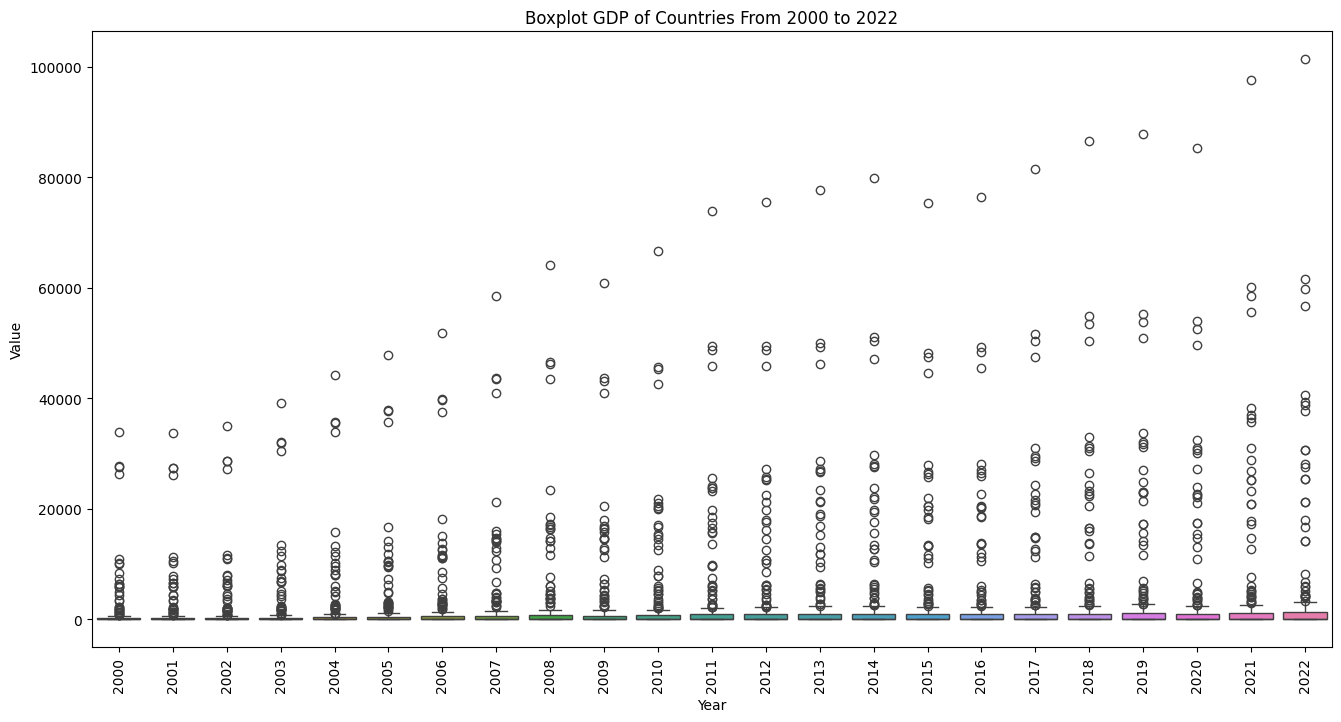

In [55]:
#Kiểm tra độ lớn dữ liệu bằng biểu đồ boxplot :
#Đảo ngược DataFrame để làm cho tên quốc gia trở thành một cột :
years = df_GDP.columns
df_GDP_boxplot = df_GDP.T

#Đặt lại tên cột :
df_GDP_boxplot.columns = range(len(df_GDP_boxplot.columns))
df_GDP_boxplot = df_GDP_boxplot.T

#Vẽ biểu đồ Boxplot bằng Seaborn :
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_GDP_boxplot)
plt.title('Boxplot GDP of Countries From 2000 to 2022')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation = 90)
plt.show()

**Phân Tích Mức Độ Biến Động GDP Toàn Cầu (World) :**

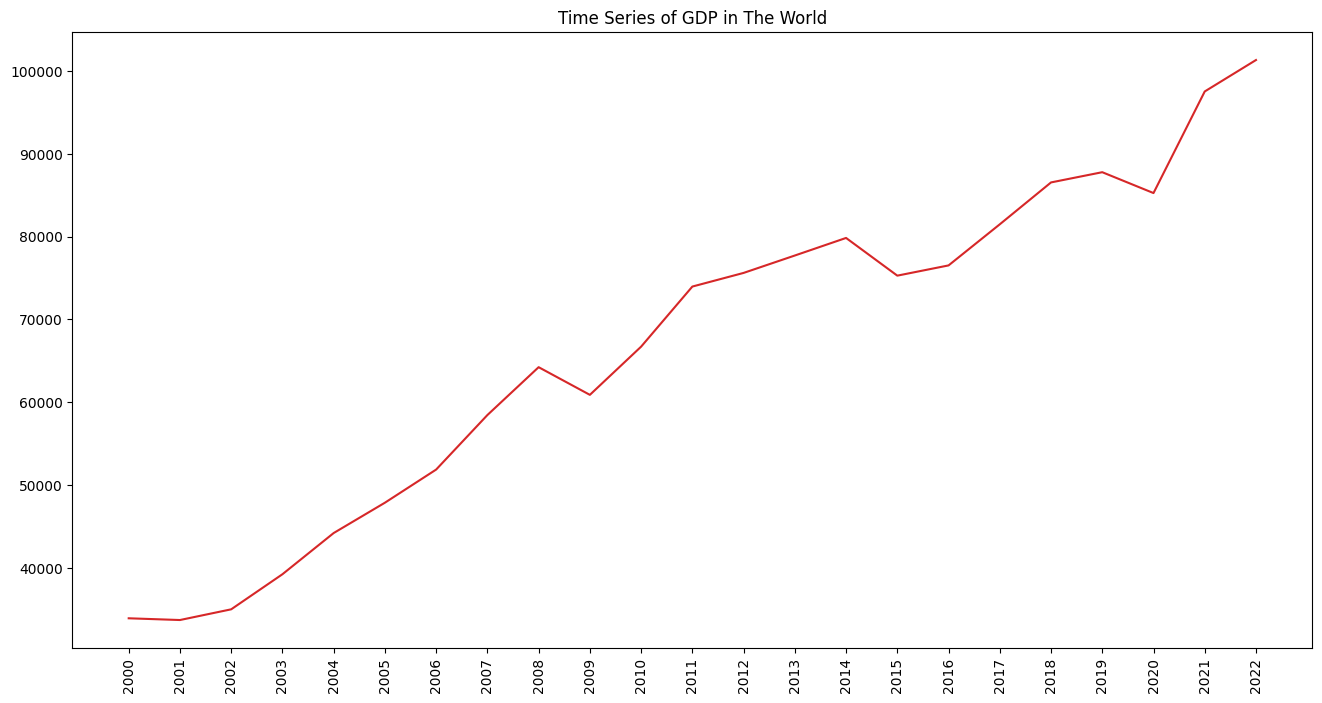

In [56]:
world_GDP = df_GDP.copy()
#Chọn World làm chuỗi thời gian :
time_series_world = world_GDP.iloc[-1]
world_gdp = pd.DataFrame(time_series_world)

#Vẽ biểu đồ đường :
plt.figure(figsize= (16,8))
plt.plot(world_gdp.index, world_gdp['World'], color='tab:red')
plt.title("Time Series of GDP in The World")
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y')

**Phân Tích Xu Hướng (Trend) , Mùa Vụ (seasonal), Thành Phần Bất Quy Tắc (Residuals) GDP Toàn Cầu (World)**

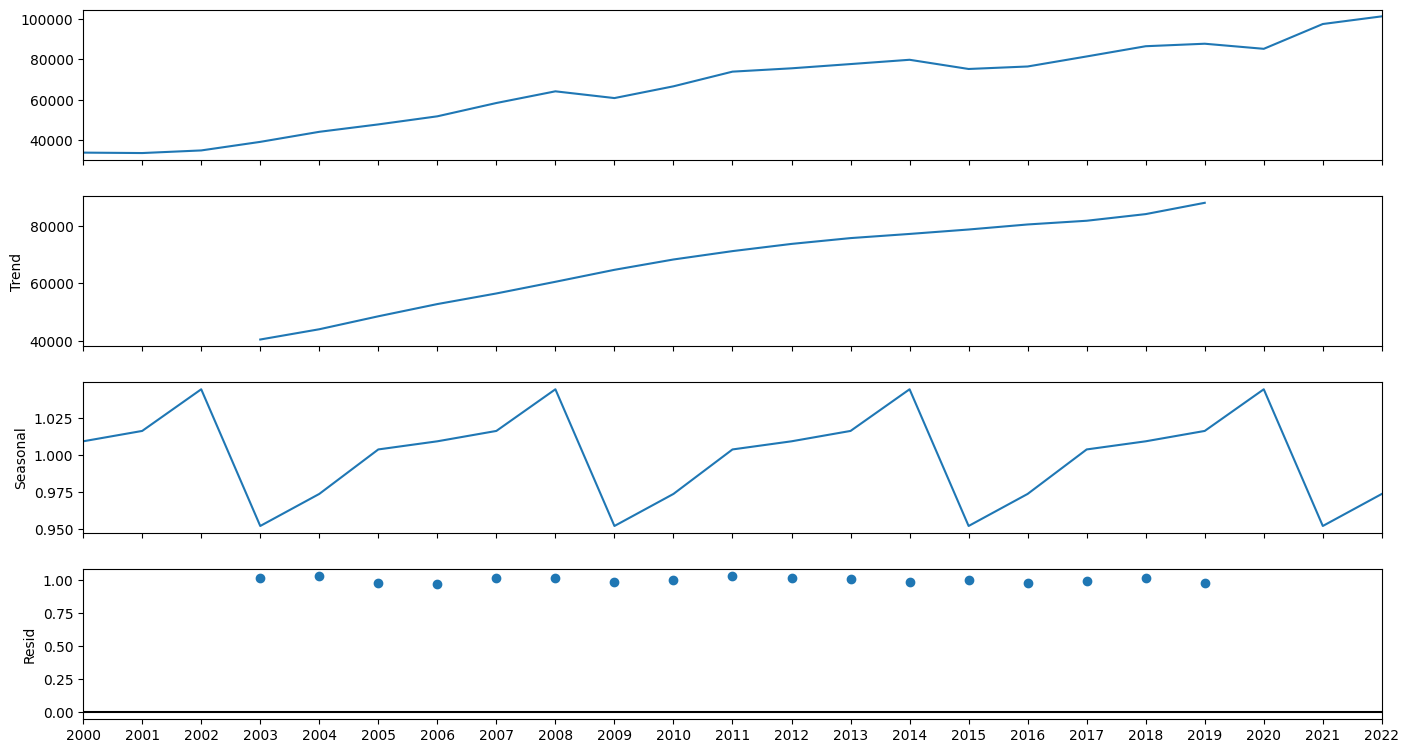

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decompose = df_GDP.copy()

#Chọn World làm chuỗi thời gian :
time_series = df_decompose.iloc[-1]
world_time_series = pd.DataFrame(time_series)

#Phân tích mùa vụ cho DataFrame df_GDP
decomposition_multi = seasonal_decompose(world_time_series, model='multiplicative', period=6)

#Vẽ biểu đồ
fig = decomposition_multi.plot()
fig.set_size_inches((16, 8))
plt.show()

**Kiểm tra mức độ ổn định của dữ liệu GDP Toàn Cầu (World) :**

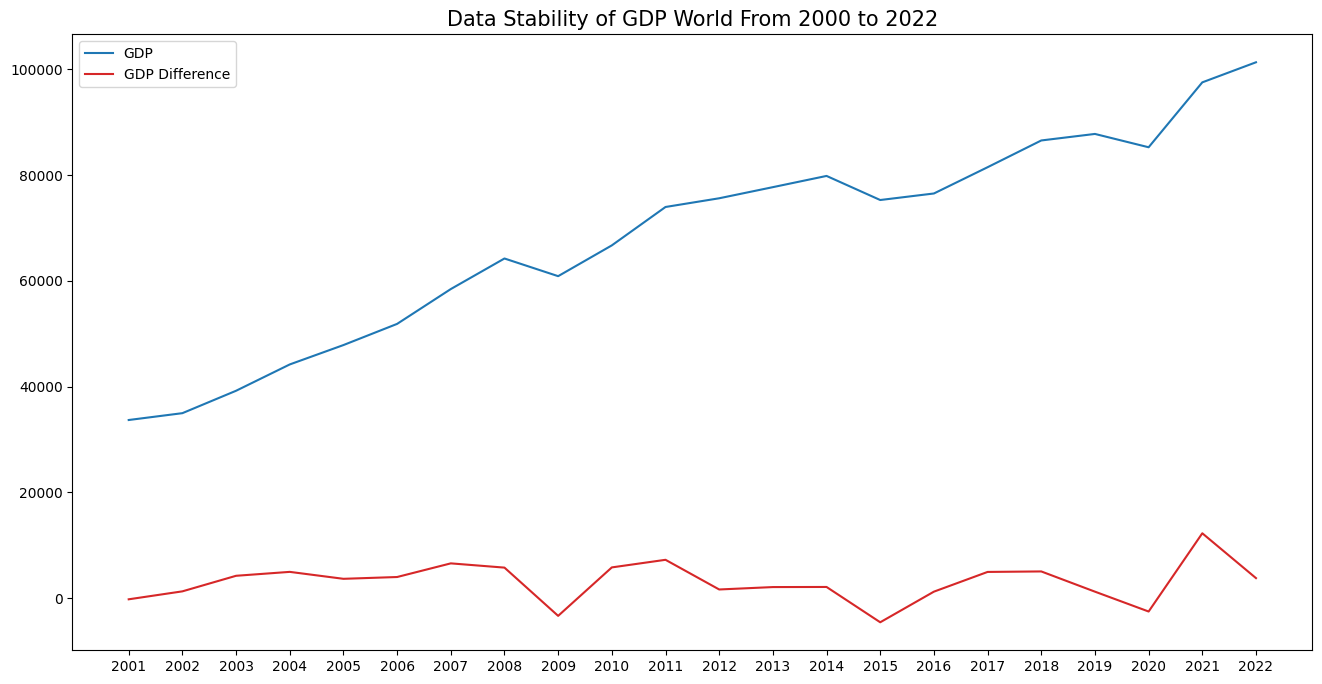

In [59]:
#Tính sự khác biệt giữa các quan sát liên tiếp của cột :
world_time_series_1 = world_time_series.copy()
world_time_series_1['Difference'] = world_time_series_1['World'].diff(periods=1)

#Loại bỏ các hàng có giá trị NaN (do diff() tạo ra) :
world_time_series_1 = world_time_series_1.dropna()

#Vẽ biểu đồ :
plt.figure(figsize=(16, 8))
plt.plot(world_time_series_1['World'], label='GDP')
plt.plot(world_time_series_1['Difference'], label='GDP Difference', color='tab:red')
plt.title('Data Stability of GDP World From 2000 to 2022', size=15)
plt.legend()
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(world_time_series, autolag='AIC')
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -0.252710
p-value: 0.931940
Critical Values:
{'1%': -3.769732625845229, '5%': -3.005425537190083, '10%': -2.6425009917355373}
Failed to Reject Null Hypothesis - Time Series is Non-Stationary


*     ADF Test Statistic: Giá trị thống kê của kiểm định ADF. Trong trường hợp này, giá trị là -0.252710. Giá trị này cần được so sánh với các giá trị ngưỡng để quyết định liệu chuỗi thời gian có ổn định hay không .

*     p-value: Giá trị p của kiểm định. Trong trường hợp này, giá trị là 0.931940. Giá trị p cao đề xuất rằng không đủ bằng chứng để bác bỏ giả thuyết không ổn định. Điều này cũng được phản ánh trong thông báo "Failed to Reject Null Hypothesis - Time Series is Non-Stationary".

*     Critical Values: Đây là các giá trị ngưỡng ở mức ý nghĩa khác nhau (1%, 5%, và 10%). Nếu giá trị thống kê ADF nhỏ hơn các giá trị này => có đủ bằng chứng để bác bỏ giả thuyết không ổn định. Trong trường hợp này, giá trị thống kê không nhỏ hơn bất kỳ giá trị ngưỡng nào, vì vậy không thể bác bỏ giả thuyết không ổn định => kết luận rằng chuỗi thời gian không ổn định (non-stationary).

#**Nhận xét :**
*   Dựa vào phân tích mức độ biến động của GDP toàn cầu (World) thì có thể thấy được GDP tăng không đồng đều trong khoảng thời gian từ năm 2000 đến năm 2022. Có sự chững lại và giảm đáng kể ở một số cột mốc.
*   Sau khi thực hiện kiểm tra tính ổn định của GDP toàn cầu thì kết quả cho ra được là dữ liệu chuỗi thời gian GDP toàn cầu đang bị bất ổn định.


#**Câu 1 : Tình hình GDP (Gross Domestic Product) toàn cầu trong những năm đầu thế kỉ XXI giai đoạn từ năm 2000 - năm 2022 như thế nào ?**

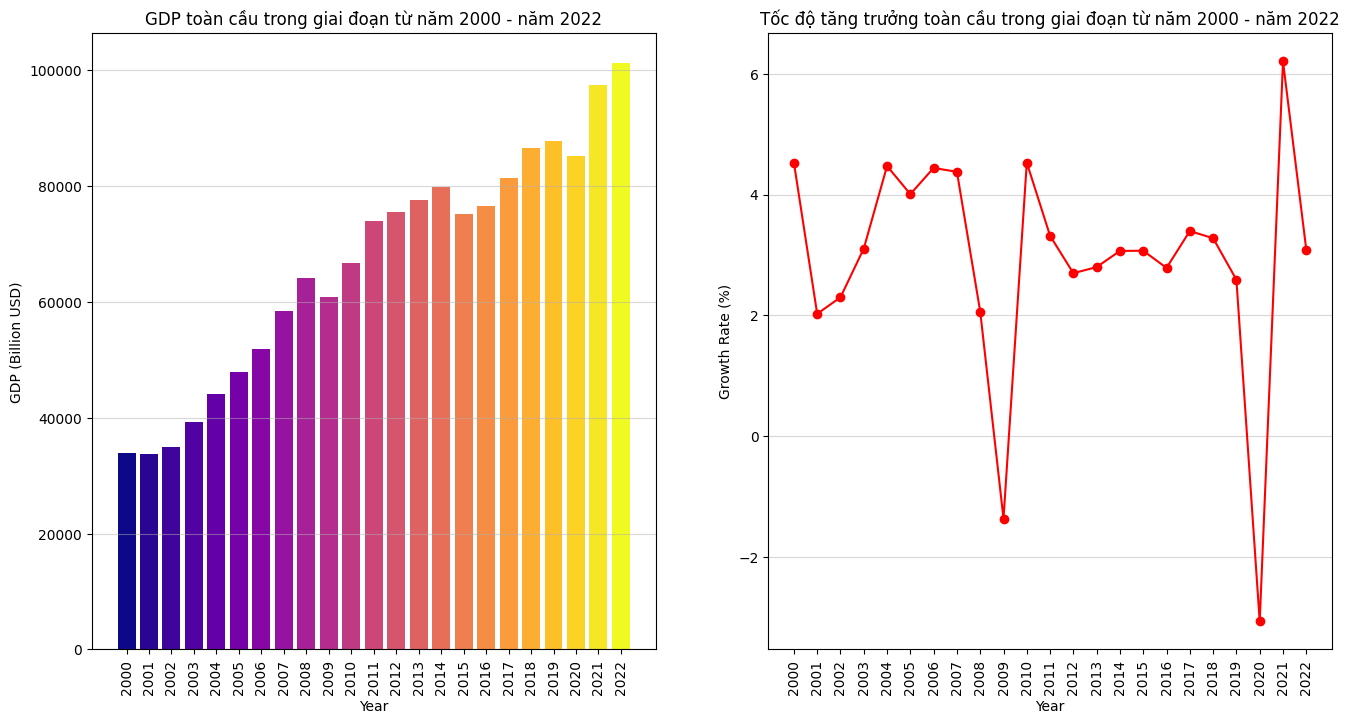

In [31]:
#Tạo biểu đồ cột (biểu đồ độ lớn) cho GDP của thế giới :
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.bar(df_GDP[df_GDP.index == 'World'].columns, df_GDP.loc['World'],
        color=plt.cm.plasma(np.linspace(0, 1, len(df_GDP[df_GDP.index == 'World'].columns))))
plt.xlabel('Year')
plt.ylabel('GDP (Billion USD)')
plt.title('GDP toàn cầu trong giai đoạn từ năm 2000 - năm 2022')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)


#Tạo biểu đồ đường cho tốc độ tăng trưởng GDP của thế giới :
plt.subplot(1,2,2)
plt.plot(df_GDP_GRW[df_GDP_GRW.index == 'World'].columns, df_GDP_GRW.loc['World'] , marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Tốc độ tăng trưởng toàn cầu trong giai đoạn từ năm 2000 - năm 2022')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.show()

**Nhận xét :**

*   Nhìn vào biểu đồ GDP và biểu đồ tốc độ tăng trưởng kinh tế có thể thấy được là nền kinh tế của toàn cầu có sự dao động và mức độ tăng trưởng không đồng đều trong giai đoạn từ năm 2000 - 2022
*   Đối với sự dao động tích cực thì có thể thấy được là có sự phát triển ổn định trong những giai từ năm 2001 - 2008 , 2011-2014 , 2016-2019
*   Đối với sự dao động tiêu cực thì có thể thấy được là có 2 cột mốc mà GDP toàn cầu bị suy giảm đáng kể đó là vào năm 2009 và năm 2020

#**Câu 2 : Vì sao giá trị GDP và tốc độ tăng trưởng (Growth Rate) toàn cầu trong 2 năm : 2019 và 2020 lại có sự suy giảm đáng kể như vậy ?**

In [32]:
#Lấy giá trị hàng hoá xuất nhập khẩu và % giá trị sản xuất thêm GDP :
world_exports = df_EXPORTS[df_EXPORTS.index == 'World']
world_imports = df_IMPORTS[df_IMPORTS.index == 'World']
world_manu = df_MANU[df_MANU.index == 'World']

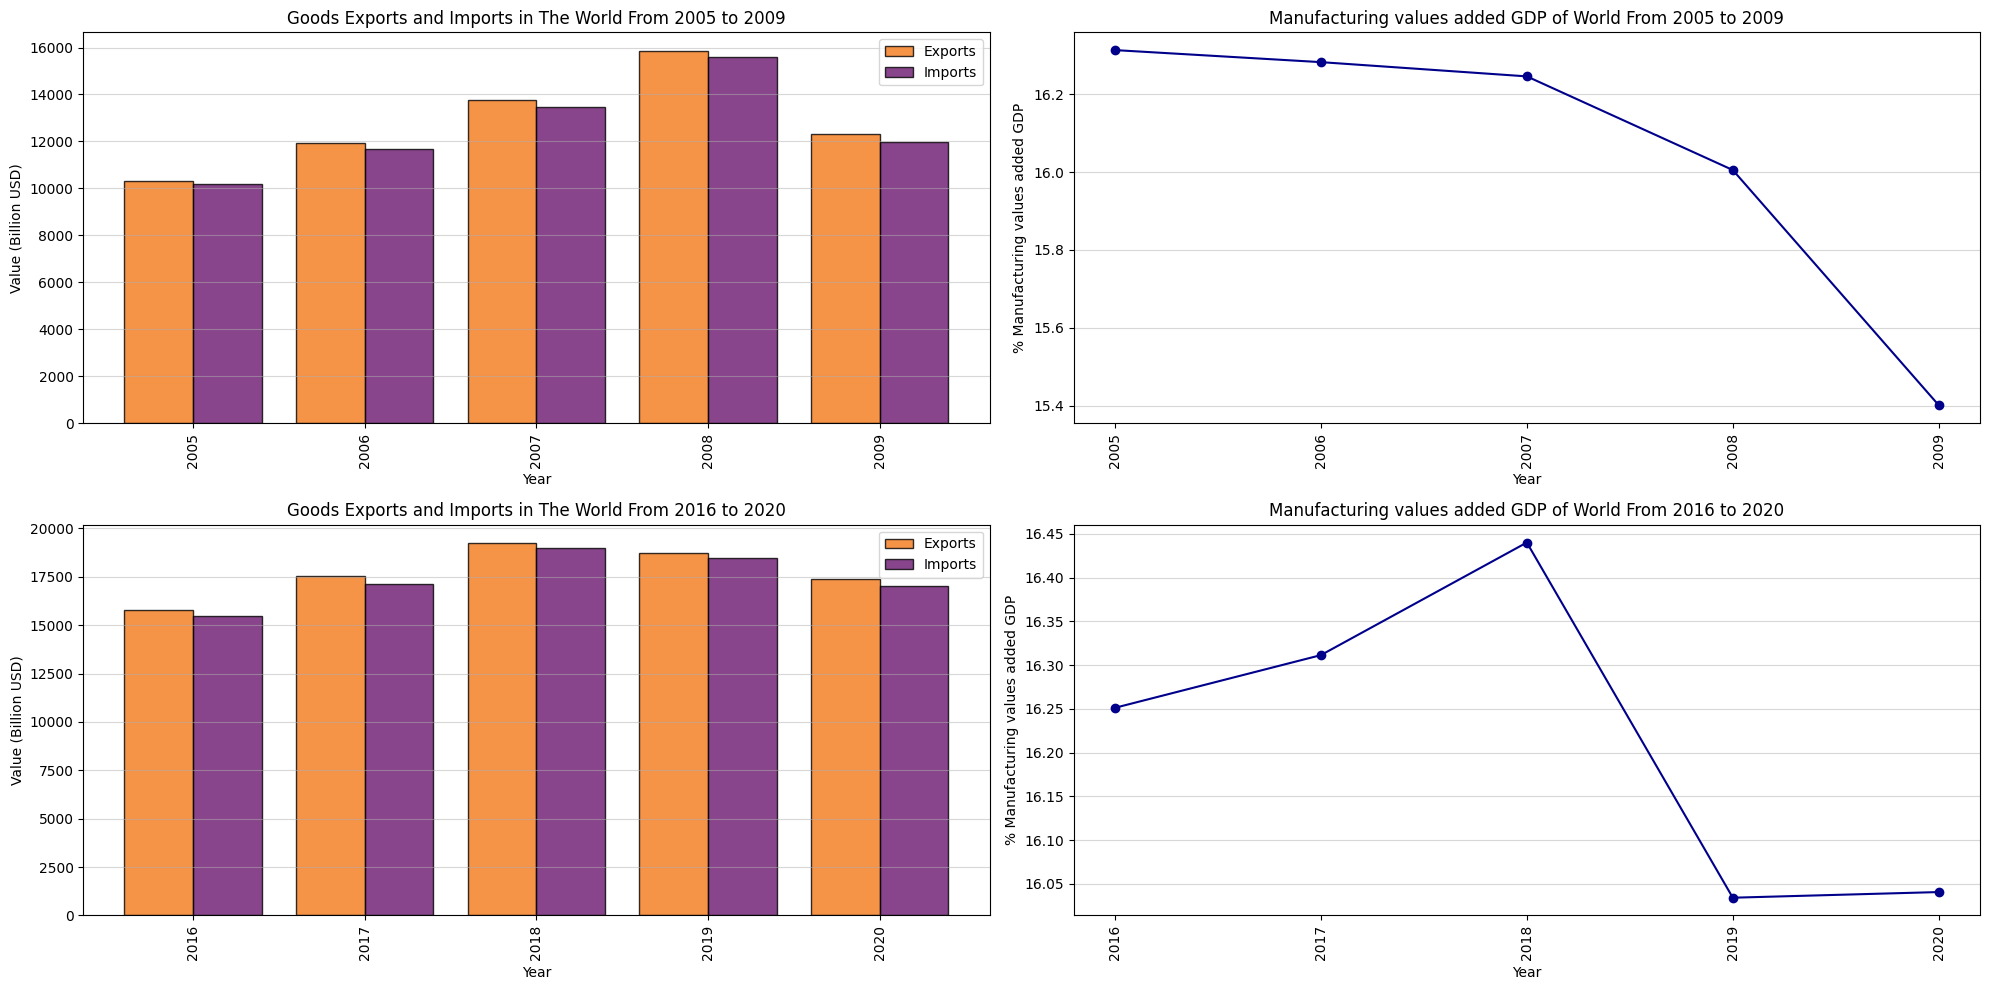

In [33]:
#Giải thích cho 2009 :
#Tạo Figure :
plt.figure(figsize=(20, 10))

#Lấy danh sách các năm :
list_years_2009 = list(range(2005, 2010))
list_years_2009 = [str(year) for year in list_years_2009]

#Tạo biểu đồ xuất nhập khẩu hàng hoá toàn cầu :
plt.subplot(2,2,1)
plt.bar([int(year) - 0.2 for year in list_years_2009], world_exports[list_years_2009].values[0],
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8,edgecolor = 'black' ,label='Exports')
plt.bar([int(year) + 0.2 for year in list_years_2009], world_imports[list_years_2009].values[0],
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8,edgecolor = 'black' ,label='Imports')

plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('Goods Exports and Imports in The World From 2005 to 2009')
plt.legend()
plt.xticks([int(year) for year in list_years_2009] , rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()


#Tạo biểu đồ cho phần trăm sản xuất ảnh hưởng tới GDP :
plt.subplot(2,2,2)
plt.plot(list_years_2009, world_manu[list_years_2009].values[0] , marker='o', color='darkblue')
plt.xlabel('Year')
plt.ylabel('% Manufacturing values added GDP')
plt.title('Manufacturing values added GDP of World From 2005 to 2009')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()

#Giải thích cho 2020 :
#Lấy danh sách các năm :
list_years_2020 = list(range(2016, 2021))
list_years_2020 = [str(year) for year in list_years_2020]

#Tạo biểu đồ xuất nhập khẩu hàng hoá toàn cầu :
plt.subplot(2,2,3)
plt.bar([int(year) - 0.2 for year in list_years_2020], world_exports[list_years_2020].values[0],
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8,edgecolor = 'black' ,label='Exports')
plt.bar([int(year) + 0.2 for year in list_years_2020], world_imports[list_years_2020].values[0],
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8, edgecolor = 'black',label='Imports')

plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('Goods Exports and Imports in The World From 2016 to 2020')
plt.legend()
plt.xticks([int(year) for year in list_years_2020] , rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()


#Tạo biểu đồ cho phần trăm sản xuất ảnh hưởng tới GDP :
plt.subplot(2,2,4)
plt.plot(list_years_2020, world_manu[list_years_2020].values[0] , marker='o', color='darkblue')
plt.xlabel('Year')
plt.ylabel('% Manufacturing values added GDP')
plt.title('Manufacturing values added GDP of World From 2016 to 2020')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()

plt.show()

**Nhận xét : Một trong những yếu tố ảnh hưởng đến GDP (Gross Domestic Products) đó là hàng hoá xuất nhập khẩu, giá trị sản xuất (Manufacturing Values) góp phần vào GDP**
*   Đối với hàng hoá xuất nhập khẩu : Trong giai đoạn 2005 - 2009 có sự tăng đều từ 2005 - 2008 và bị giảm sâu vào 2009 . Còn trong giai đoạn 2016 - 2020 thì cũng tương tự vậy nhưng mức độ suy giảm ở năm 2020 ít hơn so với 2019.
*   Đối với giá trị sản xuất góp phần vào GDP : Trong giai đoạn 2005 - 2009 có sự giảm đều từ 2005 - 2008 và giảm mạnh vào 2009 . Còn trong giai đoạn 2016 - 2020 thì có sự khác biệt rõ rệt đó là tăng đều và nhẹ trong 3 năm 2016, 2017, 2018 rồi sau đó suy giảm vào 2019 kéo dẫn đến 2020.
*   Điểm chung giữa 2 cột mốc này : Về hàng hoá xuất nhập khẩu thì có sự tăng đều vào các năm trước và giảm vào năm bị khủng hoảng . Còn về giá trị sản xuất thì đã có sự giảm vào năm trước khủng hoảng và kéo theo năm sau.

#**Câu 3 : Những khu vực nào hiện đang có giá trị GDP cao nhất ảnh hưởng đến toàn cầu ?**

In [34]:
#Đọc file iso country code của các quốc gia ""
iso = pd.read_csv("/content/drive/MyDrive/DataAnalyst/LyThuyet/Analyst_GPD/wikipedia-iso-country-codes.csv")
country_name_code = pd.read_csv("/content/drive/MyDrive/DataAnalyst/LyThuyet/Analyst_GPD/GDP_AND_GDP_GROWTH.csv",
                          usecols=['Country Code', 'Country Name'])
#Chuẩn hoá lại tên cột :
iso.rename(columns={"English short name lower case": "Country",
                    "Alpha-3 code":"iso_alpha"},
           inplace=True)
iso.set_index("Country", inplace=True)

#Loại bỏ trùng lắp :
country_name_code = country_name_code.drop_duplicates()

#Tạo 1 bản sao dataframe thực hiện Geographical Map :
df_GDP_GGP_MAPS = df_GDP.copy()

#Thực hiện merge Country Code dựa vào cột "Country Name" :
df_GDP_GGP_MAPS = pd.merge(df_GDP_GGP_MAPS, country_name_code, on="Country Name", how="left")

#Gắn ISO alpha code vào DataFrame df_GDP_GGP_MAPS :
df_GDP_GGP_MAPS = pd.merge(df_GDP_GGP_MAPS, iso, how='left', left_on='Country Code', right_on='iso_alpha')

#Loại bỏ các dòng Null :
df_GDP_GGP_MAPS = df_GDP_GGP_MAPS.dropna()

#Thiết lập index :
df_GDP_GGP_MAPS = df_GDP_GGP_MAPS.set_index('Country Name')

df_GDP_GGP_MAPS.head()

2000        2001       2002        2003  \
Country Name                                                         
Albania                3.480355    3.922101   4.348068    5.611496   
Algeria               54.790399   54.744698  56.760356   67.863850   
Angola                 9.129595    8.936079  15.285592   17.812705   
Antigua and Barbuda    0.826370    0.800481   0.814381    0.856396   
Argentina            284.203750  268.696750  97.724004  127.586973   

                           2004        2005        2006        2007  \
Country Name                                                          
Albania                7.184686    8.052077    8.896075   10.677325   
Algeria               85.332581  103.198212  117.027280  134.977083   
Angola                23.552058   36.970901   52.381025   65.266416   
Antigua and Barbuda    0.919730    1.022963    1.157663    1.312759   
Argentina            164.657930  198.737095  232.557261  287.530508   

                           2008        2009  ...        2018        2019  \
Country Name                                 ...                           
Albania               12.881353   12.044206  ...   15.156424   15.401826   
Algeria              171.000700  137.211004  ...  174.910685  171.760275   
Angola                88.538665   70.307196  ...   79.450688   70.897963   
Antigua and Barbuda    1.370070    1.228330  ...    1.661530    1.725352   
Argentina            361.558037  332.976485  ...  524.819892  447.754684   

                           2020        2021        2022  Country Code  \
Country Name                                                            
Albania               15.162734   17.930565   18.916379           ALB   
Algeria              145.743543  163.472388  194.998450           DZA   
Angola                48.501561   66.505130  106.782771           AGO   
Antigua and Barbuda    1.410796    1.601367    1.867733           ATG   
Argentina            385.740508  487.902572  631.133384           ARG   

                     Alpha-2 code  iso_alpha  Numeric code     ISO 3166-2  
Country Name                                                               
Albania                        AL        ALB           8.0  ISO 3166-2:AL  
Algeria                        DZ        DZA          12.0  ISO 3166-2:DZ  
Angola                         AO        AGO          24.0  ISO 3166-2:AO  
Antigua and Barbuda            AG        ATG          28.0  ISO 3166-2:AG  
Argentina                      AR        ARG          32.0  ISO 3166-2:AR  

[5 rows x 28 columns]

In [64]:
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display, clear_output
import time

#Duyệt qua từng năm và tạo biểu đồ choropleth cho mỗi năm:
for year in range(2000, 2023):
  ds = df_GDP_GGP_MAPS[[str(year), "iso_alpha"]]
  ds.reset_index(inplace=True)

  #Thực hiện log scale để dễ quan sát hơn:
  ds["log"] = ds[str(year)].apply(lambda x: np.log(x))

  #Tạo biểu đồ choropleth với Plotly :
  fig = px.choropleth(ds, locations="iso_alpha",
                      color= 'log',
                      hover_name=df_GDP_GGP_MAPS.index.unique(),
                      color_continuous_scale=px.colors.sequential.Plasma)

  #Cập nhật Layout của biểu đồ :
  fig.update_layout(
      title_text=f'Gross Domestic Product {year}',
      title_pad={"l": 500}
  )

  #Hiển thị biểu đồ
  display(fig)
  time.sleep(4)  # Đợi 4 giây trước khi hiển thị biểu đồ tiếp theo
  clear_output(wait=True)  # Xóa biểu đồ trước khi hiển thị biểu đồ mới

**Nhận xét : Dựa vào bản đồ phân bố GDP trên toàn thế giới vào năm 2022**
*   Những khu vực có GDP cao được phân bố chủ yếu ở 3 khu vực : Châu Mỹ (Hoa Kỳ, Canada , Brazil) , Châu Á (Trung Quốc, Rusia , India, Australia) và Châu Âu (Anh , Pháp , Đức).
*   Còn khu vực Châu Phi thì có sự phân bố GDP thấp hay các nước ở khu vực Châu Mỹ (Bolivia,Suriname,Paraguay) và Châu Á (Mongolia,Cambodia, Lào) vẫn còn GDP thấp so với các nước trong khu vực.

#**Câu 4 : Trong giai đoạn từ năm 2000 đến năm 2022 GDP (Gross Domestic Product) của các quốc đứng đầu trên thế giới (Top 20 quốc gia) có sự chuyển biến như thế nào ?**

In [36]:
!pip install bar_chart_race

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.1 MB/s eta 0:00:00


In [37]:
#Chỉ lấy các quốc gia không lấy các khu vực :
countries = country_name_code.merge(iso , how='left', left_on='Country Code', right_on='iso_alpha')

#Drop null :
countries.dropna(inplace = True)

countries = countries['Country Name']
countries.tolist()
race_countries = df_GDP[df_GDP.index.isin(countries.tolist())]
race_countries = race_countries.T

race_countries.head()

Country Name   Albania    Algeria     Angola  Antigua and Barbuda   Argentina  \
2000          3.480355  54.790399   9.129595             0.826370  284.203750   
2001          3.922101  54.744698   8.936079             0.800481  268.696750   
2002          4.348068  56.760356  15.285592             0.814381   97.724004   
2003          5.611496  67.863850  17.812705             0.856396  127.586973   
2004          7.184686  85.332581  23.552058             0.919730  164.657930   

Country Name     Aruba   Australia     Austria  Azerbaijan  Bahamas, The  ...  \
2000          1.873453  416.167815  197.289625    5.272616       8.07647  ...   
2001          1.896457  379.629302  197.508773    5.707616       8.31783  ...   
2002          1.961844  395.788696  214.394867    6.236088       8.88116  ...   
2003          2.044112  467.739080  262.273631    7.276413       8.87009  ...   
2004          2.254831  614.659980  301.457562    8.680406       9.05529  ...   

Country Name    Uganda    Ukraine  United Kingdom  United States    Uruguay  \
2000          6.193247  32.375084     1665.534877   10250.947997  22.823271   
2001          5.840504  39.309581     1649.827264   10581.929774  20.898762   
2002          6.178564  43.956164     1785.729916   10929.112955  13.606516   
2003          6.606884  52.010356     2054.422857   11456.442041  12.045638   
2004          7.939488  67.220154     2421.525082   12217.193198  13.686330   

Country Name   Vanuatu  Venezuela, RB   Viet Nam  West Bank and Gaza    Zambia  
2000          0.272015     117.146466  31.172518              4.3136  3.600632  
2001          0.257927     122.911037  32.685199              4.0037  4.094441  
2002          0.262597      92.893588  35.064106              3.5558  4.193850  
2003          0.314471      83.620629  39.552513              3.9680  4.901870  
2004          0.364997     112.451400  45.427855              4.6031  6.221110  

[5 rows x 162 columns]

In [38]:
import bar_chart_race as bcr
import warnings

warnings.filterwarnings('ignore')

bcr.bar_chart_race(df=race_countries,
                   n_bars=20,
                   orientation="h",
                   title="Gross Domestic Product (Billions USD)",
                   cmap="tab20b",
                   steps_per_period=20, period_length=1000)

**Nhận xét :**
*   Dựa vào biểu đồ bar chart race của 20 quốc gia đứng đầu về GDP thì có thể thấy được cuộc đua về GDP có sự chuyển biến căng thẳng.
*   Trong giai đoạn từ 2000 đến 2022 thì Hoa Kỳ luôn đứng đầu các quốc gia về GDP và các nước ở khu vực Châu Âu (Anh, Pháp, Đức) luôn đứng ở vị trí hàng đầu (sau Hoa Kỳ và Nhật Bản) vào những năm đầu của giai đoạn 2000 - 2022
*   Đầu giai đoạn từ năm 2000 - 2004 thì 3 nước đứng đầu là Hoa Kỳ, Nhật, Đức nhưng sau đó trong giai đoạn từ 2005 - 2022 có sự vươn lên mạnh mẽ của Trung Hoa Đại Lục vào năm 2009 đã bước lên đứng ở vị trị thứ 2 sau Hoa Kỳ về sản lượng GDP và bắt đầu phát triển cách biệt rõ rệt so với các nước còn lại trong giai đoạn còn lại (từ 2009 - 2022).
*   Ngoài Trung Quốc thì India cũng có sự phát triển mạnh vào cuối giai đoạn từ 2015 - 2022 và vào 2021 đã vươn lên đứng vị trí thứ 4 trên toàn thế giới.

#**Câu 5 : 10 quốc gia nào đang đứng đầu về GDP vào năm 2022 ?**

In [39]:
#Tạo bản sao :
df_top_10 = race_countries.copy()

#Lấy năm 2022 :
df_top_10_2022 = df_top_10.loc['2022']

#Lấy ra 10 quốc gia đầu :
top_10_countries_GDP = df_top_10_2022.sort_values(ascending=False).head(10)

#Lấy ra GDP toàn cầu năm 2022 :
world_GDP = df_GDP.loc['World','2022']

#Tạo Series cho 'World':
world_gdp_series = pd.Series({'World': world_GDP})

#Thêm World vào danh sách :
top_10_and_world_GDP = top_10_countries_GDP.append(world_gdp_series).sort_values()

#Tạo DataFrame từ Series :
df_top_10_and_world_GDP = top_10_and_world_GDP.reset_index()

df_top_10_and_world_GDP.set_index('index', inplace = True)
df_top_10_and_world_GDP.rename(columns = {0 : 'GDP'} , inplace = True)

df_top_10_and_world_GDP

GDP
index                            
Italy                 2049.737165
Canada                2137.939220
Russian Federation    2240.422427
France                2779.092237
United Kingdom        3089.072722
India                 3416.645826
Germany               4082.469491
Japan                 4232.173916
China                17963.171479
United States        25439.700000
World               101325.686725

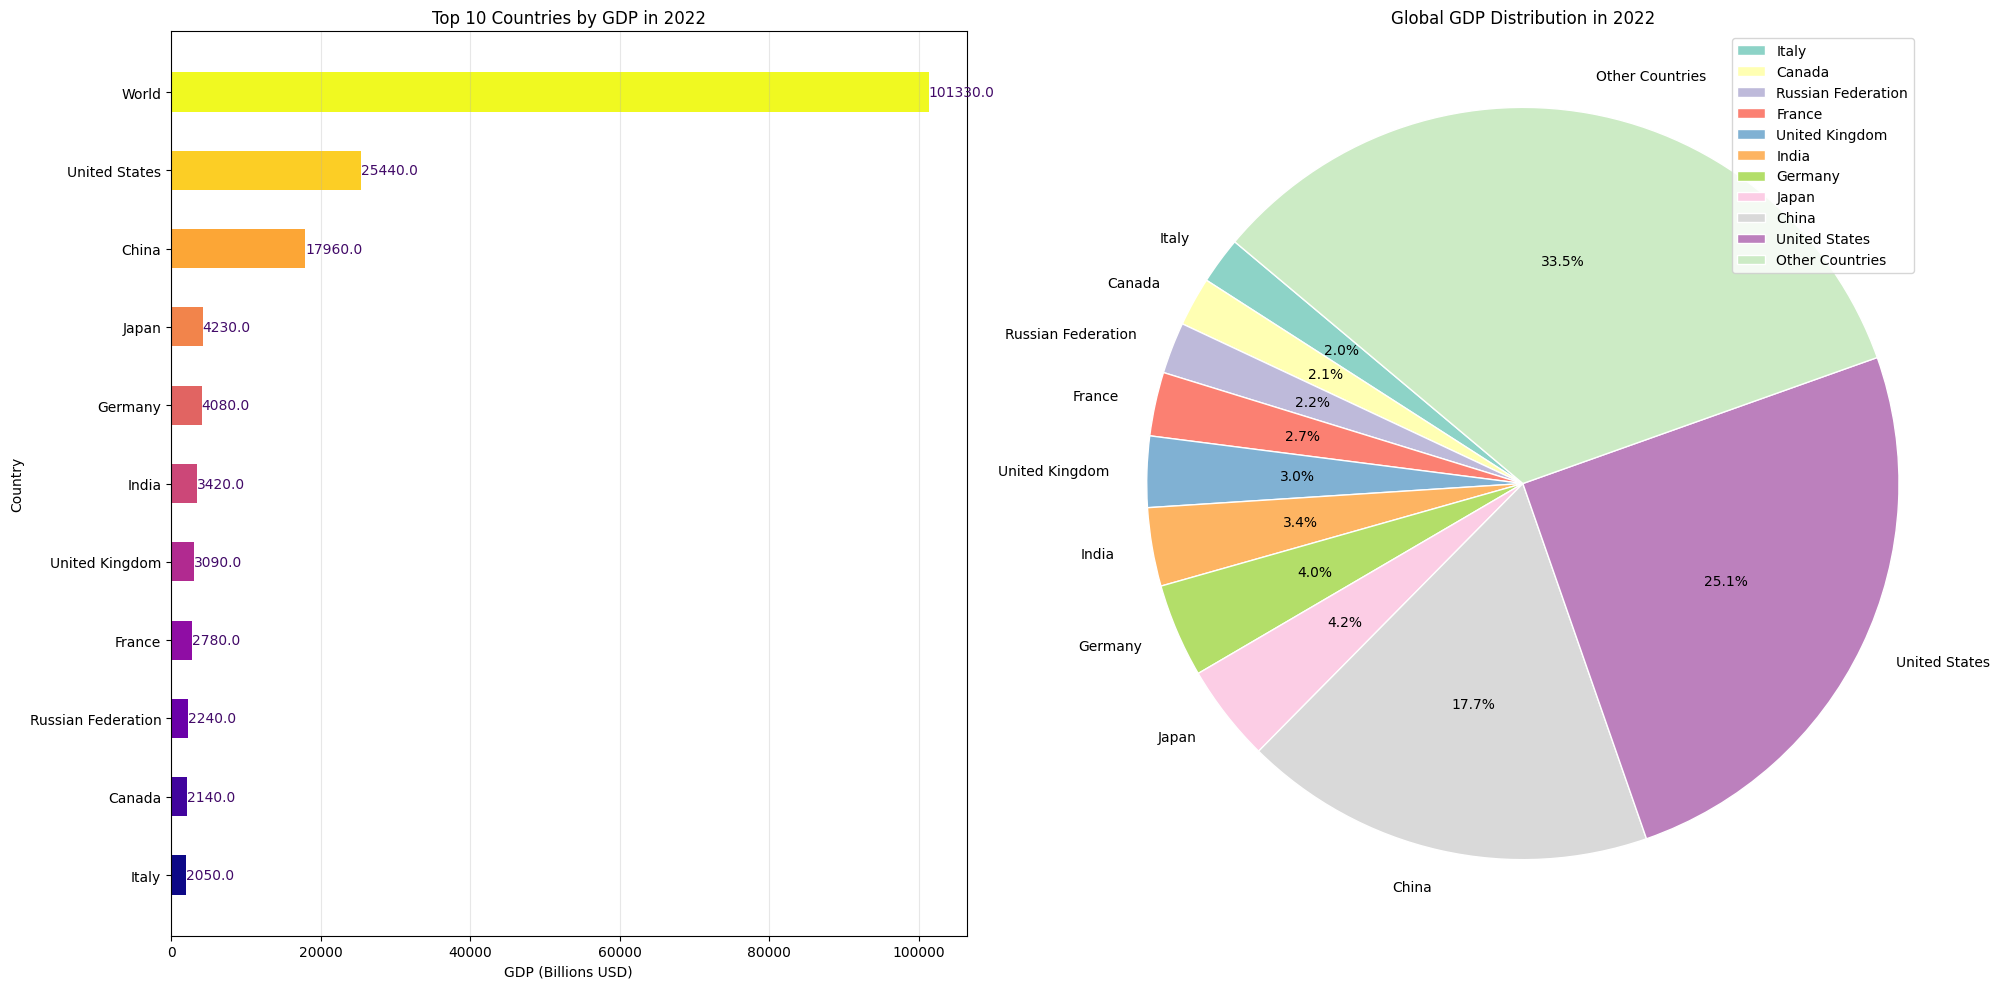

In [40]:
plt.figure(figsize=(20, 10))

#Vẽ biểu đồ cột :
plt.subplot(1,2,1)
plt.barh(df_top_10_and_world_GDP.index,df_top_10_and_world_GDP['GDP'],
         color=plt.cm.plasma(np.linspace(0, 1, len(df_top_10_and_world_GDP.index))),
         height=0.5)
plt.xlabel('GDP (Billions USD)')
plt.ylabel('Country')
plt.grid(axis='x', alpha = 0.3)
plt.title('Top 10 Countries by GDP in 2022')
for i , name in enumerate(df_top_10_and_world_GDP.index) :
  plt.text(round(df_top_10_and_world_GDP.values[i][0],-1), name , str(round(df_top_10_and_world_GDP.values[i][0],-1)),
          color=plt.cm.inferno(0.2), fontsize=10, va='center')


#Tạo một danh sách chứa tên quốc gia và GDP của từng quốc gia
countries = df_top_10_and_world_GDP.index.tolist()
gdp_values = df_top_10_and_world_GDP['GDP'].tolist()
countries = countries[:-1]
world_gdp = gdp_values[-1]
gdp_values = gdp_values[:-1]

#Tính phần trăm GDP của từng quốc gia :
percentages = [(gdp / world_gdp) * 100 for gdp in gdp_values]

#Thêm "Other Countries" vào danh sách :
countries.append("Other Countries")
other_countries_gdp = 100 - sum(percentages)
percentages.append(other_countries_gdp)

#Vẽ biểu đồ tròn :
plt.subplot(1,2,2)
plt.pie(percentages, labels=countries, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set3"),wedgeprops=dict(edgecolor='w'))
plt.title('Global GDP Distribution in 2022')
plt.axis('equal')
plt.legend(loc="upper right", labels=countries)


plt.tight_layout()
plt.show()

**Nhận xét :**
*   Nhìn vào biểu đồ cột có thể được sản lượng GDP của 10 quốc gia đứng đầu là cực kì lớn chủ yếu thuộc 3 khu vực Châu Á , Châu Âu , Châu Mỹ
*   Nhìn vào biểu đồ tròn thì thấy được mức độ ảnh hưởng lớn của những quốc gia này đến GDP toàn cầu (2 quốc gia ảnh hưởng lớn nhất là Hoa Kỳ(25,1%) và Trung Quốc(17,7%)).

#**Câu 6 : Vì sao Trung Quốc phát triển mạnh mẽ và vươn lên vị trí thứ 2 về GDP trên thế giới trong giai đoạn từ năm 2009 đến năm 2022 ?**

In [41]:
#Chuẩn bị dữ liệu :
years_china = [str(year) for year in range(2009,2023)]

GDP_CHINA = df_GDP.loc['China', years_china]
GDP_CHINA = pd.DataFrame(GDP_CHINA)

GRWT_CHINA = df_GDP_GRW.loc['China', years_china]
GRWT_CHINA = pd.DataFrame(GRWT_CHINA)

EXPORTS_CHINA = df_EXPORTS.loc['China', years_china]
EXPORTS_CHINA = pd.DataFrame(EXPORTS_CHINA)

IMPORTS_CHINA = df_IMPORTS.loc['China', years_china]
IMPORTS_CHINA = pd.DataFrame(IMPORTS_CHINA)

MANU_CHINA = df_MANU.loc['China', years_china]
MANU_CHINA = pd.DataFrame(MANU_CHINA)

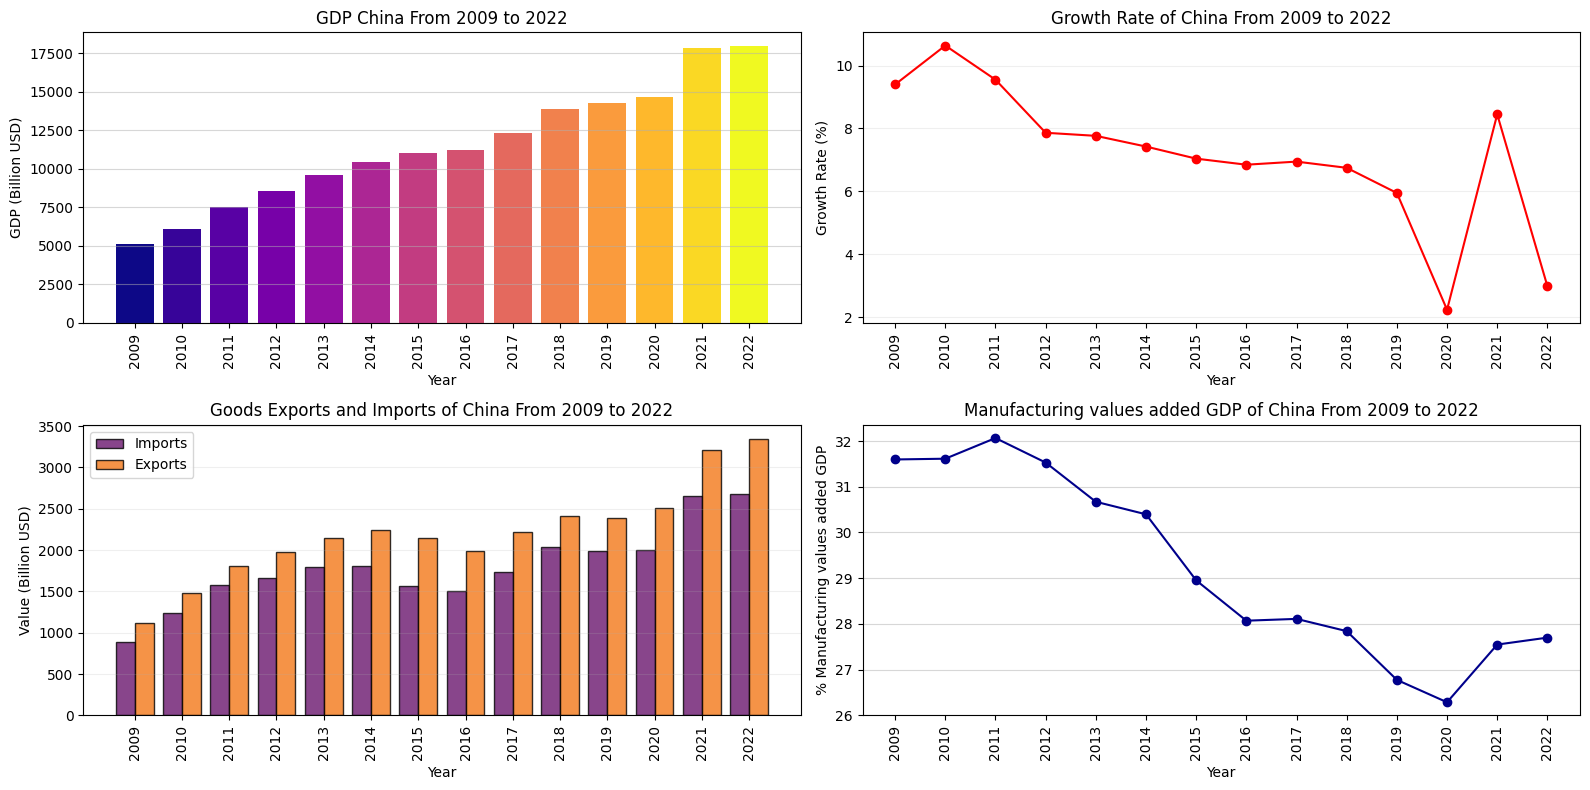

In [42]:
#Biểu đồ cột GDP China :
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
plt.bar(np.array(GDP_CHINA.index), np.reshape(GDP_CHINA.values,-1),
        color=plt.cm.plasma(np.linspace(0, 1, len(GDP_CHINA.index))))
plt.xlabel('Year')
plt.ylabel('GDP (Billion USD)')
plt.title('GDP China From 2009 to 2022')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()

#Biểu đồ đường tốc độ tăng trưởng (Growth Rate):
plt.subplot(2,2,2)
plt.plot(GRWT_CHINA.index, np.reshape(GRWT_CHINA.values,-1) , marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of China From 2009 to 2022')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.2)
plt.tight_layout()


#Biểu đồ cột hàng hoá xuất nhập khẩu :
plt.subplot(2,2,3)
plt.bar([int(year) - 0.2 for year in years_china],np.reshape(IMPORTS_CHINA.values,-1),
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8, edgecolor='black',label='Imports')
plt.bar([int(year) + 0.2 for year in years_china],np.reshape(EXPORTS_CHINA.values,-1),
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8, edgecolor='black' ,label='Exports')

plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('Goods Exports and Imports of China From 2009 to 2022')
plt.legend()
plt.xticks([int(year) for year in years_china], rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.2)
plt.tight_layout()


#Biểu đồ đường phần trăm sản xuất góp phần vào GDP :
plt.subplot(2,2,4)
plt.plot(MANU_CHINA.index, np.reshape(MANU_CHINA.values,-1) , marker='o', color='darkblue')
plt.xlabel('Year')
plt.ylabel('% Manufacturing values added GDP')
plt.title('Manufacturing values added GDP of China From 2009 to 2022')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()



plt.show()

**Nhận xét :**
*   Trong giai đoạn 2009 - 2022 GDP của Trung Quốc có sự tăng trưởng ổn định (dựa vào biểu đồ Growth Rate) và mức tăng trưởng cao (hầu như từ 6% trở lên)
*   Về GDP thì cũng có sự tăng đều theo từng năm trong giai đoạn
*   Về hàng hoá xuất nhập khẩu có sản lượng lớn từ 900 - hơn 3000 (Billion USD)
nhưng vẫn có sự chững nhẹ trong một số năm : 2015, 2016, 2019.
*   Về giá trị sản xuất vẫn luôn chiếm phần trăm lớn ở Trung Quốc (lên tới 32%) cũng là 1 trong những yếu tố góp phần lớn vào nền GDP của Trung Quốc.

#**Câu 7 : Tình hình GDP của Hoa Kỳ diễn ra như thế nào so với toàn cầu trong giai đoạn 2000 đến 2022 mà vẫn luôn dẫn đầu các quốc gia trên thế giới cho đến thời điểm năm 2022 ?**


In [43]:
#Chuẩn bị dữ liệu :
years_USA = [str(year) for year in range(2000,2023)]

GDP_USA = df_GDP.loc['United States', years_USA]
GDP_USA = pd.DataFrame(GDP_USA)

GRWT_USA = df_GDP_GRW.loc['United States', years_USA]
GRWT_USA = pd.DataFrame(GRWT_USA)

GDP_WORLD = df_GDP.loc['World', years_USA]
GDP_WORLD = pd.DataFrame(GDP_WORLD)

GRWT_WORLD = df_GDP_GRW.loc['World', years_USA]
GRWT_WORLD = pd.DataFrame(GRWT_WORLD)

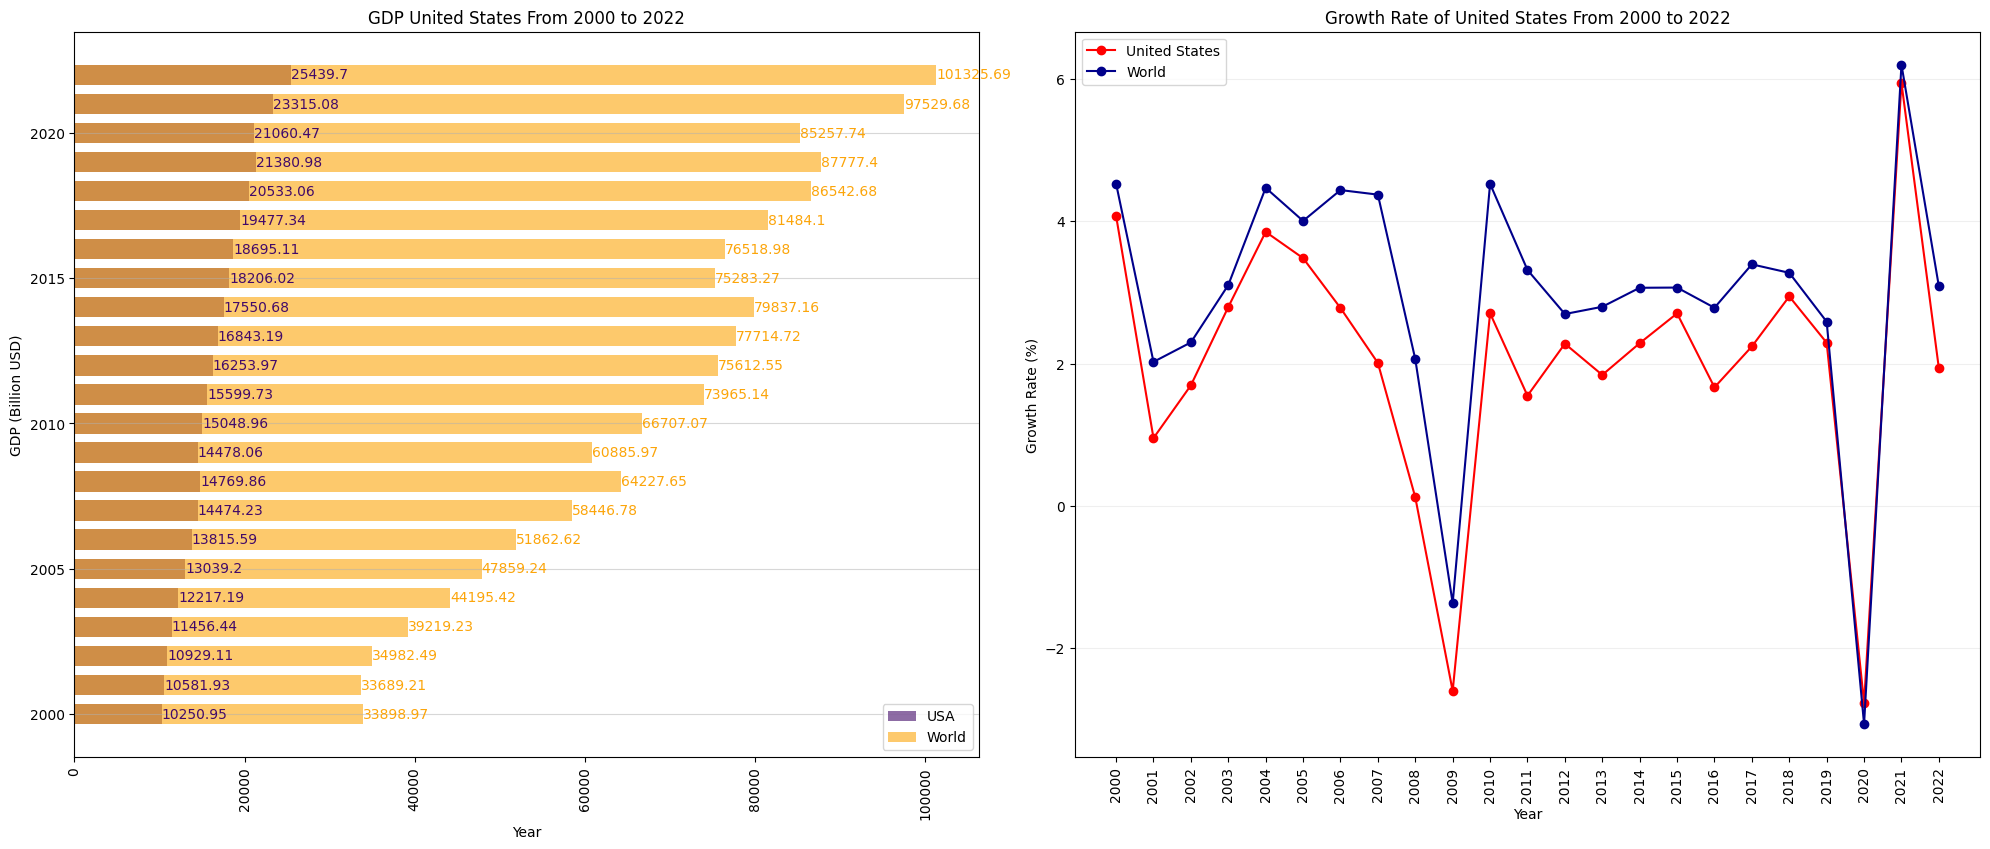

In [44]:
#Biểu đồ cột GDP USA :
plt.figure(figsize=(20, 16))
plt.subplot(2, 2, 1)

plt.barh([int(year) for year in years_USA], np.reshape(GDP_USA.values, -1),
        height=0.7, alpha = 0.6 ,
        color=plt.cm.inferno(0.2), label='USA')
plt.barh([int(year) for year in years_USA], np.reshape(GDP_WORLD.values, -1),
        height=0.7,alpha = 0.6,
        color=plt.cm.inferno(0.8), label='World')
plt.xlabel('Year')
plt.ylabel('GDP (Billion USD)')
plt.title('GDP United States From 2000 to 2022')

#Vẽ chú thích cho từng năm :
for i, year in enumerate(years_USA):
  plt.text(round(GDP_USA.values[i][0],2), int(year), str(round(GDP_USA.values[i][0],2)),
          color=plt.cm.inferno(0.2), fontsize=10, va='center')
  plt.text(round(GDP_WORLD.values[i][0],2), int(year), str(round(GDP_WORLD.values[i][0],2)),
          color=plt.cm.inferno(0.8), fontsize=10, va='center')


plt.legend(loc='best')
plt.xticks(rotation= 90)
plt.grid(True , axis= 'y' , alpha= 0.5)
plt.tight_layout()

#Biểu đồ đường tốc độ tăng trưởng (Growth Rate):
plt.subplot(2, 2, 2)
plt.plot(GRWT_USA.index, np.reshape(GRWT_USA.values,-1) , marker='o', color='red',label = 'United States')
plt.plot(GRWT_WORLD.index, np.reshape(GRWT_WORLD.values,-1) , marker='o', color='Darkblue',label = 'World')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of United States From 2000 to 2022')
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.grid(True , axis= 'y' , alpha= 0.2)
plt.tight_layout()

plt.show()

**Nhận xét :**
*   Nhìn vào biểu đồ cột thể hiện GDP của Hoa Kỳ so với toàn cầu trong giai đoạn từ 2000 đến 2022 có thể thấy được là giá trị cực lớn trải dài từ 10250.95 đến 25439.7 Billion USD. Chiếm từ 1/4 đến 1/3 GDP toàn cầu.
*   Nhìn vào biểu đồ đường của Hoa Kỳ và Toàn Cầu có thể thấy tốc độ tăng trưởng của Hoa Kỳ và Toàn có sự tương đồng với nhau . Có sự tăng giảm trong giai đoạn 2000 đến 2022 (tăng trưởng cao nhất khoảng 6% và suy giảm nghiêm trọng nhất khoảng dưới -2%) và giảm mạnh ở 2 cột mốc khủng hoảng là 2009 và 2020. Điều này thể hiện được tầm quan trọng và mức độ ảnh hưởng lớn của Hoa Kỳ đến thế giới.

#**Câu 8 : Những quốc gia nào đang phát triển và tăng trưởng ổn định trong giai đoạn từ năm 2000 đến năm 2022?**

In [45]:
#Chuẩn bị dữ liệu :
#Lọc ra các quốc gia có tốc độ tăng trưởng luôn lớn hơn hoặc bằng 0 :
stable_growth = df_GDP_GRW[df_GDP_GRW.ge(0).all(axis=1)]
stable_growth = stable_growth[:-4]

stable_GDP = df_GDP[df_GDP.index.isin(stable_growth.index.tolist())]

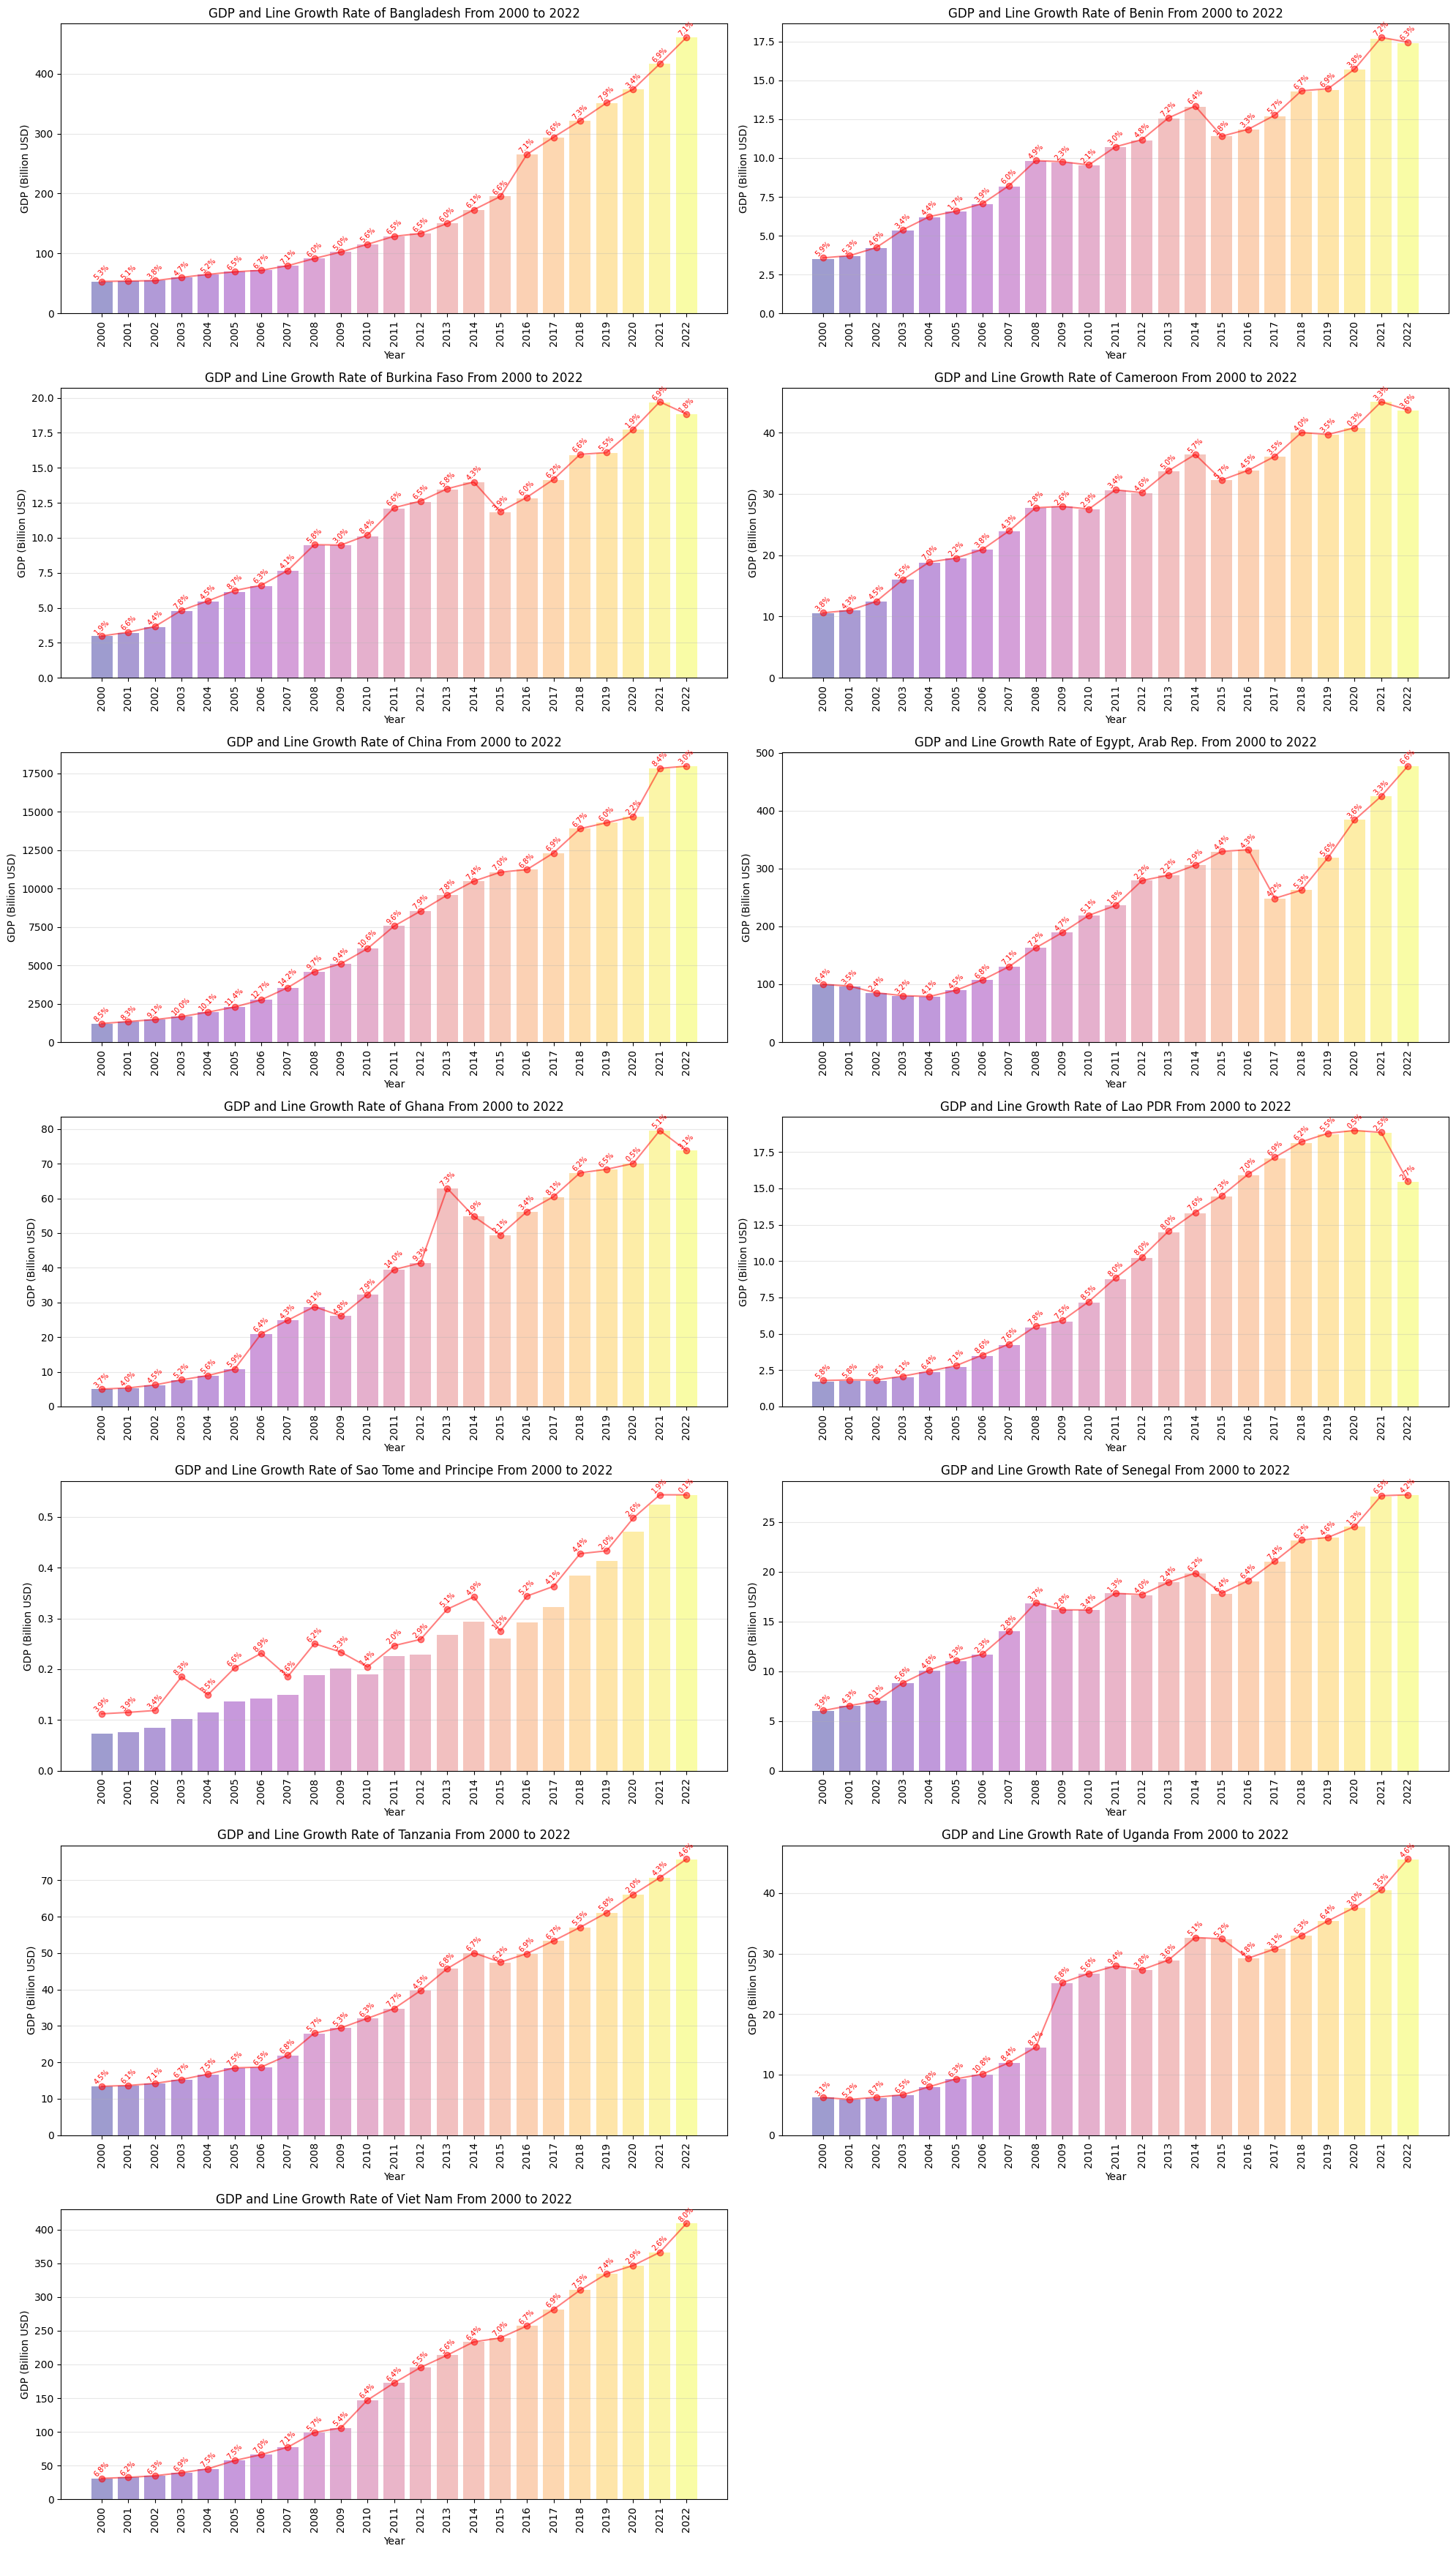

In [46]:
#Trực quan hoá :
#Tính số lượng dòng số lượng cột :
num_cols = 2
num_rows = len(stable_GDP.index.tolist()) // num_cols
if len(stable_GDP.index.tolist()) % num_cols != 0:
  num_rows += 1  #Tăng số hàng nếu có dư

#Tạo biểu đồ :
plt.figure(figsize=(num_cols*10, num_rows*5))
for i, country in enumerate(stable_GDP.index):
  bar_width = 0.4
  #Biểu đồ cột :
  plt.subplot(num_rows,num_cols, i + 1)
  plt.bar(stable_GDP.columns, stable_GDP.loc[country].values,
          color=plt.cm.plasma(np.linspace(0, 1, len(stable_GDP.columns))),
          alpha = 0.4)

  #Biểu đồ đường tốc độ tăng trưởng (Growth Rate) :
  plt.plot(stable_growth.columns, (stable_GDP.loc[country].values + (stable_growth.loc[country].values/100)),
                                   marker='o', color='red',alpha = 0.5)

  # Đặt mỗi điểm trên biểu đồ đường ở trên đầu của mỗi cột
  for year, growth, gdp in zip(stable_growth.columns, stable_growth.loc[country].values, stable_GDP.loc[country].values):
    # Tính toán vị trí của chú thích
    x = stable_GDP.columns.get_loc(year)
    y = gdp + (growth/100)
    plt.text(x, y, f'{round(growth, 1)}%', ha='center', va='bottom',
             color='red', rotation=45, fontsize=7)


  plt.xlabel('Year')
  plt.ylabel('GDP (Billion USD)')
  plt.title(f'GDP and Line Growth Rate of {country} From 2000 to 2022')
  plt.xticks(rotation= 90)
  plt.grid(axis = 'y' , alpha = 0.3)


plt.tight_layout()
plt.show()

**Nhận xét :**
*   Những quốc gia trên có sự tăng trưởng ổn định và phát triển bền vững theo từng năm trong giai đoạn từ 2000 - 2022.
*   Các quốc gia như Sao Tome and Principe, Lao, Uganda, Cameroon, Benin vẫn có giá trị GDP thấp những cũng là một trong những tiềm năng thu vốn đầu tư nước ngoài , phát triển mạnh trong lai nhờ vào sự ổn định.
*   Các quốc gia đang phát triển như Viet Nam , Banglades , Tazania cũng là những nước có giá trị GDP khá cao và phát triển bền vững, tăng trưởng ổn định cũng có thể là 1 trong những nhân tố trở thành cường quốc kinh tế trong tương lai.
*   Trung Quốc là 1 trong những cường quốc kinh tế ở Châu Á (sau Hoa Kỳ) và có tốc độ tăng trưởng cao qua từng năm với tính ổn định lớn thì cũng là 1 trong những nguy cơ có thể vươn lên vị trí đứng đầu của Hoa Kỳ về GDP toàn cầu.

#**Câu 9 : Cuộc đua GDP Trung Quốc và GDP Hoa Kỳ diễn ra như thế nào trong giai đoạn từ 2000 - 2022 ?**

In [47]:
#Chuẩn bị dữ liệu :
CHINA_VS_USA_GDP = df_GDP[df_GDP.index.isin(['United States' , 'China'])]
CHINA_VS_USA_GRWT = df_GDP_GRW[df_GDP_GRW.index.isin(['United States' , 'China'])]
WORLD_GDP = df_GDP[df_GDP.index == 'World']

#Tính phần trăm :
per_avg_cn_usa = []
per_avg_cn_usa.append(((CHINA_VS_USA_GDP.values[0].mean() * 100)/(np.array(WORLD_GDP).mean())))
per_avg_cn_usa.append(((CHINA_VS_USA_GDP.values[1].mean() * 100)/(np.array(WORLD_GDP).mean())))
per_avg_cn_usa.append(100 - per_avg_cn_usa[0] - per_avg_cn_usa[1])

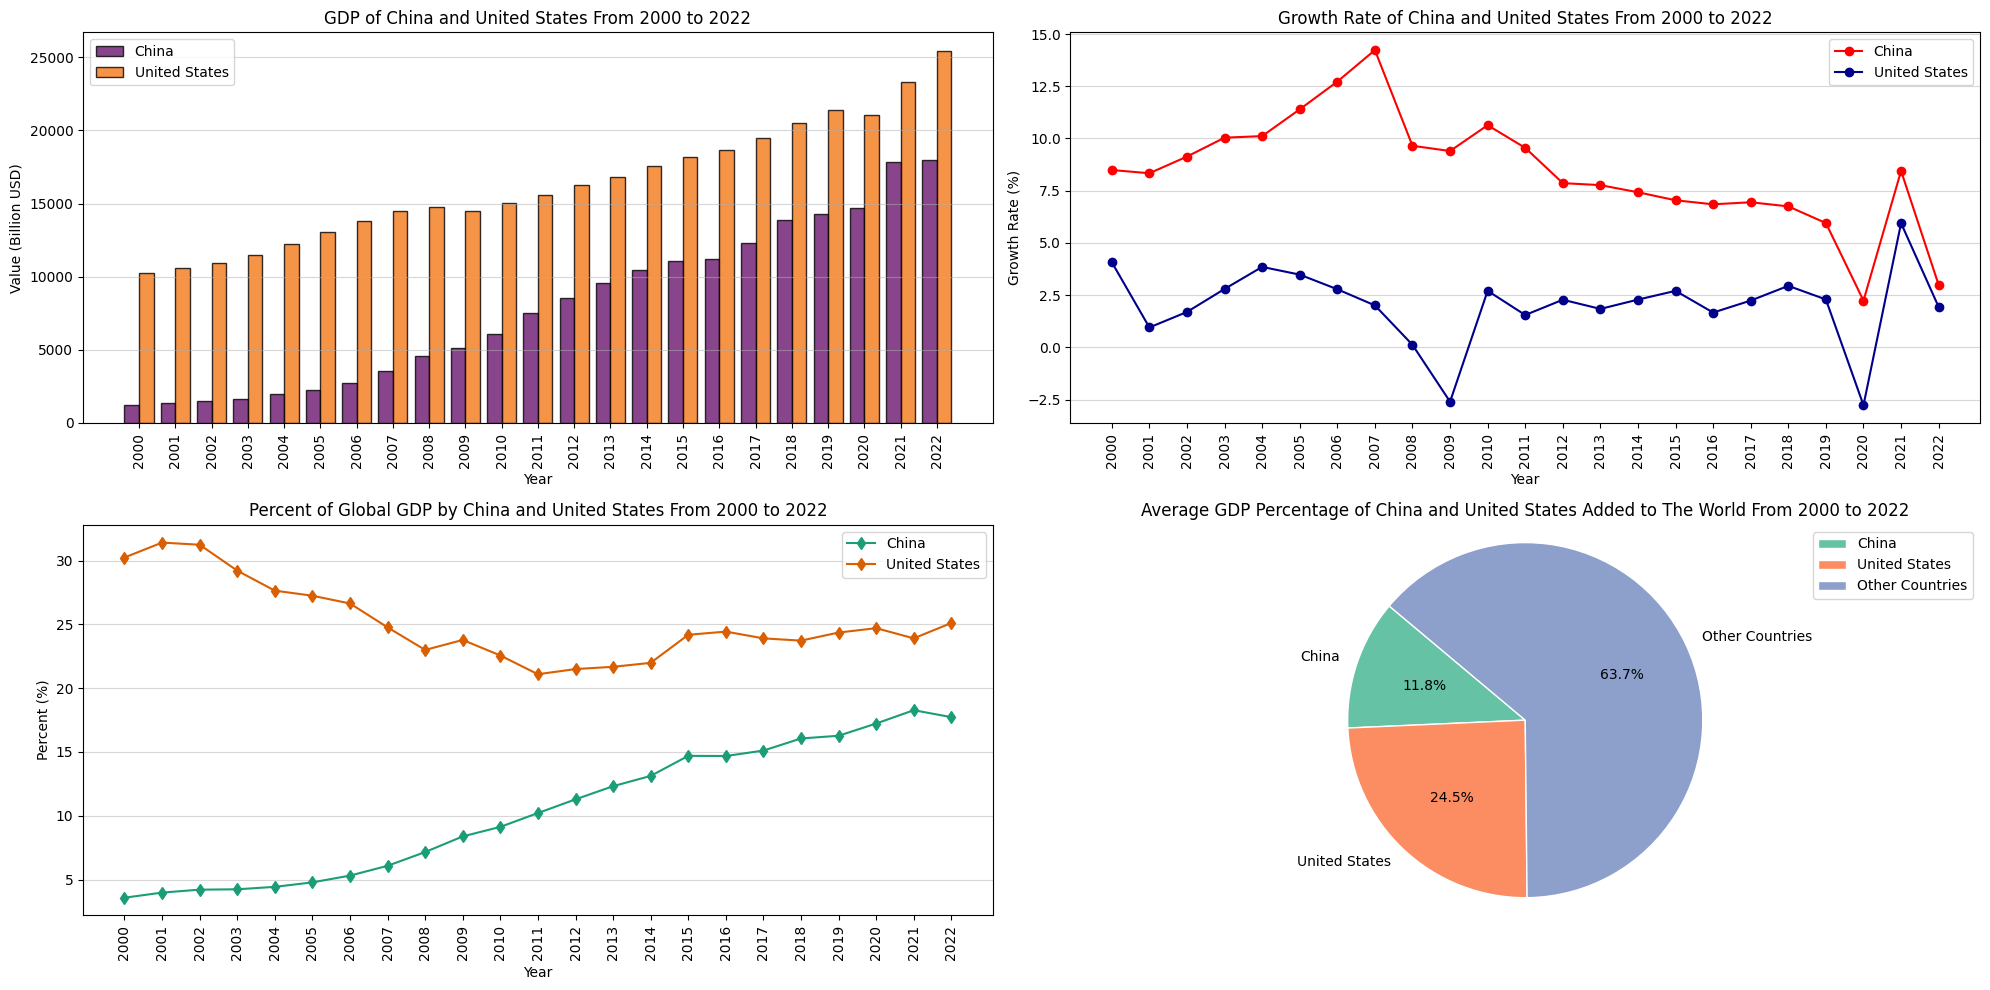

In [48]:
#Tạo biểu đồ cột Trung Quốc và Hoa Kỳ :
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)

plt.bar([year - 0.2 for year in range(2000,2023)],CHINA_VS_USA_GDP.values[0],
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8, edgecolor='black',label='China')

plt.bar([year + 0.2 for year in range(2000,2023)],CHINA_VS_USA_GDP.values[1],
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8, edgecolor='black' ,label='United States')


plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('GDP of China and United States From 2000 to 2022')
plt.legend()
plt.xticks([year for year in range(2000,2023)], rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.5)


#Biểu đồ đường tốc độ tăng trưởng (Growth Rate) :
plt.subplot(2, 2, 2)
plt.plot(CHINA_VS_USA_GRWT.columns, CHINA_VS_USA_GRWT.values[0] , marker='o', color='red',label = 'China')
plt.plot(CHINA_VS_USA_GRWT.columns, CHINA_VS_USA_GRWT.values[1] , marker='o', color='darkblue',label = 'United States')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of China and United States From 2000 to 2022')
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.grid(True , axis= 'y' , alpha= 0.5)


#Biểu đồ đường % GDP values added The World :
plt.subplot(2, 2, 3)
plt.plot(CHINA_VS_USA_GDP.columns, ((CHINA_VS_USA_GDP.values[0] * 100)/(np.array(WORLD_GDP))).reshape(-1) , marker='d',
         color=sns.color_palette("Dark2")[0],label = 'China')
plt.plot(CHINA_VS_USA_GDP.columns, ((CHINA_VS_USA_GDP.values[1] * 100)/(np.array(WORLD_GDP))).reshape(-1) , marker='d',
         color=sns.color_palette("Dark2")[1],label = 'United States')

plt.xlabel('Year')
plt.ylabel('Percent (%)')
plt.title('Percent of Global GDP by China and United States From 2000 to 2022')
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.grid(True , axis= 'y' , alpha= 0.5)


#Vẽ biểu đồ tròn :
plt.subplot(2,2,4)
plt.pie(per_avg_cn_usa, labels=['China' , 'United States' , 'Other Countries'],
        autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("Set2"),wedgeprops=dict(edgecolor='w'))
plt.title('Average GDP Percentage of China and United States Added to The World From 2000 to 2022')
plt.axis('equal')
plt.legend(loc="upper right", labels=['China' , 'United States' , 'Other Countries'])

plt.tight_layout()
plt.show()

**Nhận xét :**
*   Nhìn vào biểu đồ GDP của 2 quốc gia Hoa Kỳ và Trung Quốc có thể thấy được là trong những giai đoạn đầu từ 2000 - 2010 thì Hoa Kỳ có cách biệt lớn với Trung Quốc về sản lượng GDP nhưng vào cuối giai đoạn sau từ 2015 - 2022 thì Trung Quốc bắt đầu phát triển mạnh và thu hẹp khoảng cách với Hoa Kỳ (gần bằng 2/3 Hoa Kỳ vào năm 2022).
*   Nhìn vào biểu đồ đường tốc độ tăng trưởng hay phần trăm GDP của Trung Quốc và Hoa Kỳ so với GDP toàn cầu thì cũng có thể thấy được là vì sao Trung Quốc lại vươn lên mạnh mẽ đến vậy. Đối với tốc độ tăng trưởng Trung Quốc luôn xếp trên Hoa Kỳ (Trung Quốc cao nhất là gần 15% còn Hoa Kỳ là gần 7%) và có tính ổn định cao (giá trị thấp nhất là 2.5% còn Hoa Kỳ là -2.5%). Đối với phần trăm GDP so với toàn cầu thì Hoa Kỳ có sự suy giảm đều theo từng năm trong giai đoạn còn Trung lại tăng trưởng đều theo từng năm trong giai đoạn.
*   Nhìn vào biểu đồ tròn có thể thấy được là phần trăm GDP trung bình trên toàn bộ giai đoạn 2000 - 2022 của Trung Quốc đã gần đạt bằng 1/2 của Hoa Kỳ

#**Câu 10 : Dựa vào cuộc đua GDP của Trung Quốc và Hoa Kỳ ở trên thì trong 10 năm tới (cụ thể trong giai đoạn từ năm 2023 đến 2032), tình hình GDP và tăng trưởng của Trung Quốc với Hoa Kỳ sẽ diễn ra như thế nào ?**

In [49]:
#Chuẩn bị dữ liệu :
CHINA_GDP = df_GDP[df_GDP.index.isin(['China'])]
CHINA_GRWTH = df_GDP_GRW[df_GDP_GRW.index.isin(['China'])]

USA_GDP = df_GDP[df_GDP.index.isin(['United States'])]
USA_GRWTH = df_GDP_GRW[df_GDP_GRW.index.isin(['United States'])]

#Lấy các tập train :

#China GDP :
x_china_train_GDP = np.array([[year] for year in range(2000,2023)])
y_china_train_GDP = CHINA_GDP.values.reshape(-1)

#United States GDP :
x_usa_train_GDP = np.array([[year] for year in range(2000,2023)])
y_usa_train_GDP = USA_GDP.values.reshape(-1)

#China Growth Rate :
x_china_train_GRWTH = np.array([[year] for year in range(2000,2023)])
y_china_train_GRWTH = CHINA_GRWTH.values.reshape(-1)

#United States Growth Rate :
x_usa_train_GRWTH = np.array([[year] for year in range(2000,2023)])
y_usa_train_GRWTH = USA_GRWTH.values.reshape(-1)

In [50]:
#Import thư viện :
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [51]:
#Xây dựng hàm để hiệu chỉnh mô hình ARIMA:
def Fix_Station_ARIMA(arima_model,data_train):
  #Kiểm tra stationarity (tính ổn định) :
  is_stationary = False
  d = 1
  #Hiệu chỉnh mô hình để trở nên Stationarity :
  while not is_stationary:
    #Fit mô hình ARIMA
    arima_results = arima_model.fit()

    #Lấy p-value của kiểm tra ADF để kiểm tra tính ổn định của phần dư (residuals) :
    p_value = adfuller(arima_results.resid , autolag='AIC')[1]

    #Kiểm tra stationarity: nếu p-value nhỏ hơn ngưỡng 0.05 thì coi chuỗi là stationary
    if p_value < 0.05:
      is_stationary = True
    else:
      #Dịch chuyển d (lần hiệu chỉnh) lên 1 đơn vị :
      d += 1

      #Fit mô hình ARIMA với các tham số mới :
      arima_model = ARIMA(data_train, order=(p, d, q))

  return arima_results

**Autoregressive Integrated Moving Average :  Là mô hình phân tích thống kê sử dụng  dữ liệu chuỗi thời gian để hiểu rõ hơn về tập dữ liệu hoặc để dự đoán xu hướng trong tương lai.**

* ***Tự hồi quy (AR)*** : đề cập đến một mô hình hiển thị một biến thay đổi hồi quy theo các giá trị trễ hoặc trước đó của chính nó.
* ***Tích hợp (I)*** : biểu thị sự khác biệt của các quan sát thô để cho phép chuỗi thời gian trở nên dừng (nghĩa là các giá trị dữ liệu được thay thế bằng chênh lệch giữa các giá trị dữ liệu và các giá trị trước đó).
* ***Trung bình trượt (MA)*** : kết hợp sự phụ thuộc giữa một quan sát và sai số dư từ mô hình trung bình trượt được áp dụng cho các quan sát có độ trễ.
* p : Số lượng quan sát độ trễ trong mô hình hay còn gọi là thứ tự độ trễ.
* d : Số lần các quan sát thô khác nhau; còn được gọi là mức độ khác biệt.
* q : Kích thước của cửa sổ trung bình động, còn được gọi là thứ tự của đường trung bình động.

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

#Khởi tạo các giá trị ban đầu cho p, d và q :
p = d = q = 1

#Khởi tạo các mô hình ARIMA với các tham số ban đầu :
arima_CN_GDP= ARIMA(y_china_train_GDP, order=(p, d, q))
arima_USA_GDP= ARIMA(y_usa_train_GDP, order=(p, d, q))
arima_CN_GRWT= ARIMA(y_china_train_GRWTH, order=(p, d, q))
arima_USA_GRWT= ARIMA(y_usa_train_GRWTH, order=(p, d, q))

#Tinh chỉnh mô hình để Stationarity :
arima_CN_GDP_rs = Fix_Station_ARIMA(arima_CN_GDP,y_china_train_GDP)
arima_USA_GDP_rs = Fix_Station_ARIMA(arima_USA_GDP,y_usa_train_GDP)
arima_CN_GRWT_rs = Fix_Station_ARIMA(arima_CN_GRWT,y_china_train_GRWTH)
arima_USA_GRWT_rs = Fix_Station_ARIMA(arima_USA_GRWT,y_usa_train_GRWTH)

In [53]:
#Dự đoán các giá trị tiếp theo của chuỗi thời gian :
forecast_steps = 10  #Số lượng bước dự đoán tiếp theo
CN_PRE_GDP = arima_CN_GDP_rs.forecast(steps=forecast_steps)
USA_PRE_GDP = arima_USA_GDP_rs.forecast(steps=forecast_steps)
CN_PRE_GRWT = arima_CN_GRWT_rs.forecast(steps=forecast_steps)
USA_PRE_GRWT = arima_USA_GRWT_rs.forecast(steps=forecast_steps)

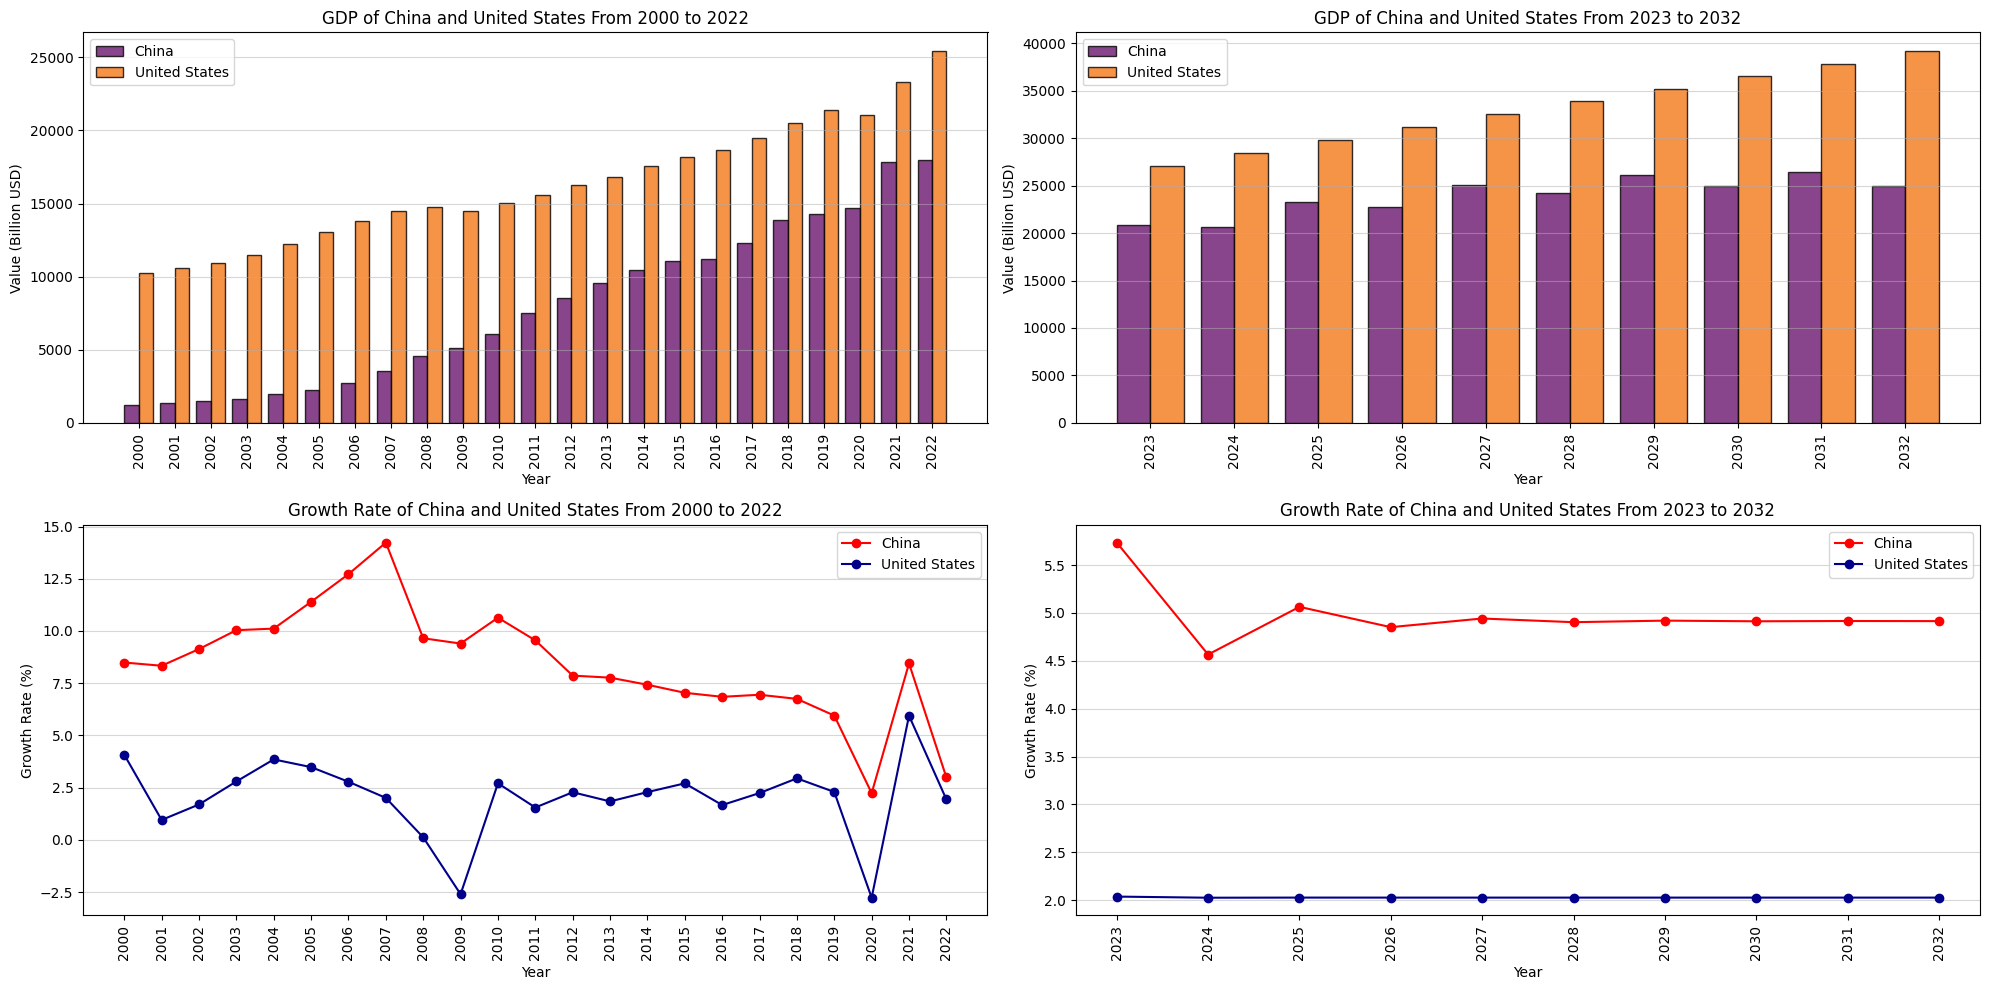

In [54]:
#Tạo biểu đồ cột Trung Quốc và Hoa Kỳ từ 2000 - 2022 :
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)

plt.bar([year - 0.2 for year in range(2000,2023)],CHINA_VS_USA_GDP.values[0],
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8, edgecolor='black',label='China')

plt.bar([year + 0.2 for year in range(2000,2023)],CHINA_VS_USA_GDP.values[1],
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8, edgecolor='black' ,label='United States')


plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('GDP of China and United States From 2000 to 2022')
plt.legend()
plt.xticks([year for year in range(2000,2023)], rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.5)


#Biểu đồ đường tốc độ tăng trưởng (Growth Rate) từ 2000 - 2022 :
plt.subplot(2, 2, 3)
plt.plot(CHINA_VS_USA_GRWT.columns, CHINA_VS_USA_GRWT.values[0] , marker='o', color='red',label = 'China')
plt.plot(CHINA_VS_USA_GRWT.columns, CHINA_VS_USA_GRWT.values[1] , marker='o', color='darkblue',label = 'United States')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of China and United States From 2000 to 2022')
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.grid(True , axis= 'y' , alpha= 0.5)


future_years = [str(year) for year in range(2023,2033)]
#Tạo biểu đồ cột Trung Quốc và Hoa Kỳ từ 2023 - 2032 :
plt.subplot(2,2,2)

plt.bar([int(year) - 0.2 for year in future_years],CN_PRE_GDP,
        width=0.4, color=plt.cm.inferno(0.3),
        alpha=0.8, edgecolor='black',label='China')

plt.bar([int(year) + 0.2 for year in future_years],USA_PRE_GDP,
        width=0.4, color=plt.cm.inferno(0.7),
        alpha=0.8, edgecolor='black' ,label='United States')


plt.xlabel('Year')
plt.ylabel('Value (Billion USD)')
plt.title('GDP of China and United States From 2023 to 2032')
plt.legend()
plt.xticks([int(year) for year in future_years], rotation=90)
plt.grid(True , axis= 'y' , alpha= 0.5)


#Biểu đồ đường tốc độ tăng trưởng (Growth Rate) từ 2023 - 2032:
plt.subplot(2, 2, 4)
plt.plot(future_years, CN_PRE_GRWT , marker='o', color='red',label = 'China')
plt.plot(future_years, USA_PRE_GRWT , marker='o', color='darkblue',label = 'United States')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate of China and United States From 2023 to 2032')
plt.xticks(rotation= 90)
plt.legend(loc='best')
plt.grid(True , axis= 'y' , alpha= 0.5)

plt.tight_layout()
plt.show()

**Nhận xét : Dựa vào độ phỏng đoán GDP và tốc độ tăng trường của mô hình ARIMA trong tưởng lai 10 năm tới (từ 2023-2032) giữa Trung Quốc và Hoa Kỳ có thể thấy được là Trung Quốc vẫn xếp sau Hoa Kỳ và chỉ thu hẹp khoảng cách so với Hoa Kỳ (cỡ 3/4 so với Hoa Kỳ) về giá trị GDP nhưng tốc độ tăng trưởng (Growth Rate) của Trung Quốc lại gấp đôi so với Hoa Kỳ. Điều này thể hiện là Trung Quốc vẫn có thể thu hẹp tiếp khoảng cách về giá trị GDP cũng như vượt qua Hoa Kỳ chiếm vị trí đứng đầu về GDP toàn cầu.**

#**Kết Luận :**
*   Dựa vào phân tích GDP các quốc gia trên thế giới và toàn cầu có thể thấy được sự biến động bất ổn định của toàn thế giới trong giai đoạn từ năm 2000-2022.
*   Sự biến động mạnh mẽ của rơi vào các cột mốc chú ý là năm 2009 và năm 2020. Tại 2 cột mốc này gây ra mức độ suy giảm nghiêm trọng của GDP thế giới (phần lớn do ảnh hưởng đến từ Mỹ).
*   Các khu vực có GDP tập trung cao hầu như nằm ở 3 Khu Vực lớn : Châu Á (Trung Quốc, Nhật Bản, Russia, India, ...); Châu Âu (Anh, Pháp, Đức) và Châu Mỹ (United States, Canada, Brazil). Sự phân bố không đồng đều giữa các khu vực vẫn còn như khu vực như Châu Phi, Châu Nam Cực vẫn còn kém phát triển và lạc hậu.
*   Trong giai đoạn từ 2000 đến 2022 có sự chuyển biến về giá trị GDP giữa các quốc gia. Và sự chuyển biến rõ rệt nhất nằm ở quốc gia là Trung Quốc và Ấn Độ đã tăng trưởng mạnh vươn lên vị trí lần lượt là thứ 2 và thứ 4 trên toàn cầu vào năm 2021.
*   Trong giai đoạn 2000 đến 2022 cũng cho thấy được các nước đang phát triển và tăng trưởng ổn định trên thế giới như : Viet Nam , Trung Quốc , Uganda, Banglades ... là một trong những tiềm năng thu hút vốn đầu tư hay phát triển mạnh trong tương lại nhờ vào sự ổn định và bền vững.
*   Ngoài sự phát triển ổn định của các nước trên thì cuộc đua giữa hai quốc gia đứng đầu là Hoa Kỳ và Trung Quốc về GDP trong giai đoạn từ năm 2000 đến năm 2022 cũng vô cùng gây cấn. Thể hiện sự phát triển mạnh mẽ, ổn định, vượt trội của Trung Quốc và bước thụt lùi của Hoa Kỳ vào nửa cuối giai đoạn từ 2015 - 2022.
*   Và cuối cùng là phỏng đoán cuộc đua giữa 2 quốc gia Hoa Kỳ và Trung Quốc về vị trí đứng đầu về GDP toàn cầu trong 10 năm tới (2023 - 2032) nhờ vào mô hình học máy Arima đã cho thấy được vị thế của Hoa Kỳ là khó có thể bị lật đổ bởi Trung Hoa Đại Lục nhưng vẫn cho thấy mức độ nguy hiểm về tốc độ tăng trưởng cao của Trung Quốc và nguy cơ Trung Quốc có thể vượt qua Hoa Kỳ là điều có thể xảy ra.